## Santander은행의 제품 추천
* https://www.kaggle.com/competitions/santander-product-recommendation/overview

산탄데르 은행은 고객들에게 예금, 적금, 대출 신용카드, 자금 관리 보험등 다양한 금융 상품을 판매를 합니다. 산탄데르 은행은 자사의 금융 제품을 사용중인 고객을 대상으로 아직 사용하지 않는 다른 제품을 소개하여 고객의 만족도를 높임과 동시에 은행 매출을 올리고 싶어 합니다.  

기존의 고객들의 제품 구매 데이터를 기반으로 고객이 신규로 구매할 제품이 무엇인지 예측하는 다중예측(multi class)문제입니다.
이번 경진대회에서 사용하는 평가 척도는 MAP@7(Mean Average Precision @7)입니다.

![1_MAP7.png](./1_MAP7.png)

예를 들어 4개의 클래스를 분류를 한다고 가정할때
첫번째 클래스 분류 정확도가 100%, 두번째 클래스 0%, 세번째 50%, 네번째 75%일 경우
(1/1 + 0 + 1/2 + 3/4)/4 = 56% -> 전체 예측 정확도의 평균

### 데이터 확인

산탄데르 은행의 1.5년간의 고객 행동 데이터를 제공합니다. 2015년 1월 28일부터 시작되며 신용카드, 저축계좌등 고객이 보유한 상품의 월별 기록을 보유하고 있습니다. 2016-05-28에 이미 보유하고 있는 제품 외에 지난 달 2016-06-28에 어떤 제품을 추가로 받을지 예측할 수 있습니다. 즉 다시 말해 2016년 5월 28일에 고객이 이미 구입했던 것 외에 무엇을 구입할 것인지 예측할 수 있습니다.

|Column Name|Description|
|------|-----|	
|fecha_dato|날짜|
|ncodpers|고객 고유식별 번호|
|ind_empleado|고용지표 A active, B ex employed, F filial, N not employee, P pasive|
|pais_residencia|고객 거주 국가|
|sexo|성별|
|age|나이|
|fecha_alta|고객이 은행과 첫 계약을 체결한 날짜
|ind_nuevo|신규 고객 지표(6개월 이내 신규 고객일 경우 값 = 1
|antiguedad|은행 거래 누적 기간(월)
|indrel|고객 등급 1(1등급) 99(해당 달에 고객 1등급이 해제되는 1등급 고객)
|ult_fec_cli_1t|1등급 고객으로서 마지막 날짜
|indrel_1mes|월초 기준 고객 등급 1:1등급 고객, 2:co-owner, P:potential, 3:former primary, 4:former co-owner)
|tiprel_1mes|월초 기준 고객 관계 유형 A (active), I (inactive), P (former customer),R (Potential)
indresi|거주지표 (S (Yes) or N (No) 고객의 거주 국가와 은행이 위치한 국가가 동일한가
indext|외국인 지표 (S (Yes) or N (No) 고객이 태어난 국가와 은행이 위치한 국가 동일 여부
conyuemp|배우자 지표 1 : 은행 직원을 배우자로 둔 고객
canal_entrada|고객 유입 채널
indfall| 고객 사망 여부 S(Yes) N(No)
tipodom| 주소 유형1, primary address
cod_prov|지방코드(주소기반)
nomprov|지방이름
ind_actividad_cliente|활발성지표 (1, active customer; 0, inactive customer)
renta|고객 총수입
segmento|분류01 - VIP, 02 - 개인 03 - 대졸자
ind_ahor_fin_ult1|예금
ind_aval_fin_ult1|보증
ind_cco_fin_ult1|당좌예금
ind_cder_fin_ult1|파생 상품 계좌
ind_cno_fin_ult1| 급여 계정
ind_ctju_fin_ult1|청소년 계정
ind_ctma_fin_ult1|마스 특별 계정
ind_ctop_fin_ult1|특정 계정
ind_ctpp_fin_ult1|특정 플러스 계정
ind_deco_fin_ult1|단기 예금
ind_deme_fin_ult1|중기 예금
ind_dela_fin_ult1|장기 예금
ind_ecue_fin_ult1|e-계정
ind_fond_fin_ult1|펀드
ind_hip_fin_ult1|부동산 대출
ind_plan_fin_ult1|연금
ind_pres_fin_ult1|대출
ind_reca_fin_ult1|세금
ind_tjcr_fin_ult1|신용카드
ind_valo_fin_ult1|증권
ind_viv_fin_ult1|홈계정
ind_nomina_ult1|급여
ind_nom_pens_ult1|연금
ind_recibo_ult1|직불 카드

In [1]:
import pandas as pd
import numpy as np
train = pd.read_csv('./train_ver2.csv')
test = pd.read_csv('./test_ver2.csv')

C:\Users\dhjun\.conda\envs\DataScience\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\dhjun\.conda\envs\DataScience\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
train.shape

(13647309, 48)

훈련데이터에는 1,364만개의 고객 데이터가 존재하며 고객마다 48개의 변수가 존재

In [3]:
train.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

## 수치형 데이터 분리하기

In [5]:
num_cols = [col for col in train.columns[:24] if train[col].dtype in ['int64','float64']]
train[num_cols].describe()

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta
count,1.364731e+07,1.361958e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07
mean,8.349042e+05,5.956184e-02,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05
std,4.315650e+05,2.366733e-01,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03
25%,4.528130e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04
50%,9.318930e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05
75%,1.199286e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05
max,1.553689e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07


tipodom은 별로 학습에 도움을 기대하기 어려운 변수

In [6]:
cat_cols = [col for col in train.columns[:24] if train[col].dtype in ['object']]
train[cat_cols].describe()

,fecha_dato,ind_empleado,pais_residencia,sexo,age,fecha_alta,antiguedad,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,nomprov,segmento
count,13647309,13619575,13619575,13619505,13647309,13619575,13647309,24793,13497528.0,13497528,13619575,13619575,1808,13461183,13619575,13553718,13457941
unique,17,5,118,2,235,6756,507,223,13.0,5,2,2,2,162,2,52,3
top,2016-05-28,N,ES,V,23,2014-07-28,0,2015-12-24,1.0,I,S,N,N,KHE,N,MADRID,02 - PARTICULARES
freq,931453,13610977,13553710,7424252,542682,57389,134335,763,7277607.0,7304875,13553711,12974839,1791,4055270,13584813,4409600,7960220


count : 해당 변수의 유효한 데이터의 개수  
unique : 해당 범주형 변수의 고유값 개수를 의미 성별 변수의 경우 2개인 것을 확인  
top : 가장 빈도가 높은 데이터  
freq : top에서 표시된 최빈 데이터의 빈도수 ind_empleado의 경우 N 데이터가 전체의 99.9%가량 차지하며 데이터가 편중되었음을 확인  
수치형 데이터에서 데이터 편중은 로그스케일이나 단위를 변환하면서 해소할 수 있으나 범주형 데이터에서는 별 도움이 안될 것이라고 생각 해볼 수 있음

다만 나이, 은행 누적 거래기간 antiguedad등이 수치형이 아닌 범주형으로 분류가 되어 있음을 보고 전처리 과정에서 수치형으로 변환해줘야 하는 것을 발견

### 범주형 변수의 고유값을 출력해보기

In [7]:
for col in cat_cols:
    uniq = np.unique(train[col].astype(str))
    print('-'*50)
    print('# col {}, n_uniq {}, uniq {}'.format(col, len(uniq), uniq))

--------------------------------------------------
# col fecha_dato, n_uniq 17, uniq ['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']
--------------------------------------------------
# col ind_empleado, n_uniq 6, uniq ['A' 'B' 'F' 'N' 'S' 'nan']
--------------------------------------------------
# col pais_residencia, n_uniq 119, uniq ['AD' 'AE' 'AL' 'AO' 'AR' 'AT' 'AU' 'BA' 'BE' 'BG' 'BM' 'BO' 'BR' 'BY'
 'BZ' 'CA' 'CD' 'CF' 'CG' 'CH' 'CI' 'CL' 'CM' 'CN' 'CO' 'CR' 'CU' 'CZ'
 'DE' 'DJ' 'DK' 'DO' 'DZ' 'EC' 'EE' 'EG' 'ES' 'ET' 'FI' 'FR' 'GA' 'GB'
 'GE' 'GH' 'GI' 'GM' 'GN' 'GQ' 'GR' 'GT' 'GW' 'HK' 'HN' 'HR' 'HU' 'IE'
 'IL' 'IN' 'IS' 'IT' 'JM' 'JP' 'KE' 'KH' 'KR' 'KW' 'KZ' 'LB' 'LT' 'LU'
 'LV' 'LY' 'MA' 'MD' 'MK' 'ML' 'MM' 'MR' 'MT' 'MX' 'MZ' 'NG' 'NI' 'NL'
 'NO' 'NZ' 'OM' 'PA' 'PE' 'PH' 'PK' 'PL' 'PR' 'PT' 'PY' 'Q

--------------------------------------------------
# col indrel_1mes, n_uniq 10, uniq ['1' '1.0' '2' '2.0' '3' '3.0' '4' '4.0' 'P' 'nan']
--------------------------------------------------
# col tiprel_1mes, n_uniq 6, uniq ['A' 'I' 'N' 'P' 'R' 'nan']
--------------------------------------------------
# col indresi, n_uniq 3, uniq ['N' 'S' 'nan']
--------------------------------------------------
# col indext, n_uniq 3, uniq ['N' 'S' 'nan']
--------------------------------------------------
# col conyuemp, n_uniq 3, uniq ['N' 'S' 'nan']
--------------------------------------------------
# col canal_entrada, n_uniq 163, uniq ['004' '007' '013' '025' 'K00' 'KAA' 'KAB' 'KAC' 'KAD' 'KAE' 'KAF' 'KAG'
 'KAH' 'KAI' 'KAJ' 'KAK' 'KAL' 'KAM' 'KAN' 'KAO' 'KAP' 'KAQ' 'KAR' 'KAS'
 'KAT' 'KAU' 'KAV' 'KAW' 'KAY' 'KAZ' 'KBB' 'KBD' 'KBE' 'KBF' 'KBG' 'KBH'
 'KBJ' 'KBL' 'KBM' 'KBN' 'KBO' 'KBP' 'KBQ' 'KBR' 'KBS' 'KBU' 'KBV' 'KBW'
 'KBX' 'KBY' 'KBZ' 'KCA' 'KCB' 'KCC' 'KCD' 'KCE' 'KCF' 'KCG' 'KCH' 'KCI'
 'KC

fecha_dato의 경우 전체가 아니라 각 월 28일에 기록된 월별 데이터임을 확인 -> 년도별 월별 데이터로 추출
고용지표 ind_empleado는 5가지 결과값 + nan 결측값   
pais_residenc는 거주 국가를 확인 할 수 있으며 알파벳 두글자 형태로 기록  

## 시각화로 데이터 살펴보기

In [8]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

--------------------------------------------------
col :  fecha_dato


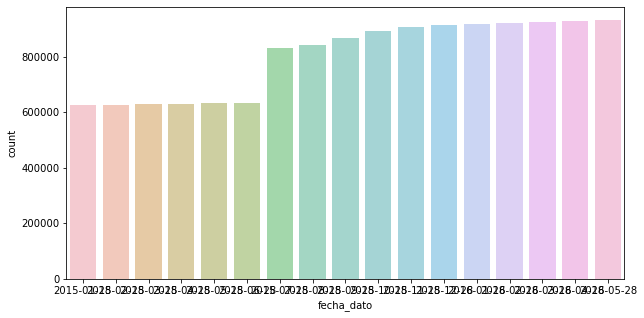

--------------------------------------------------
col :  ind_empleado


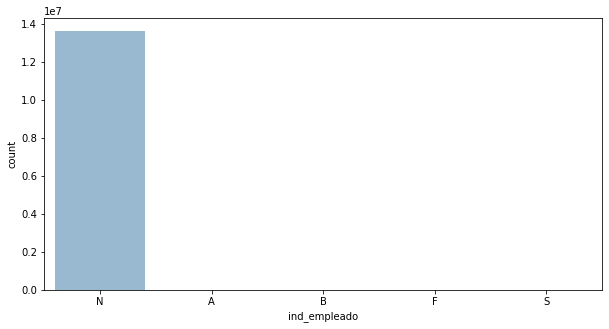

--------------------------------------------------
col :  pais_residencia


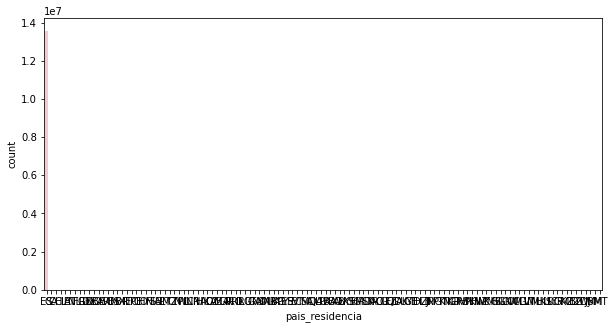

--------------------------------------------------
col :  sexo


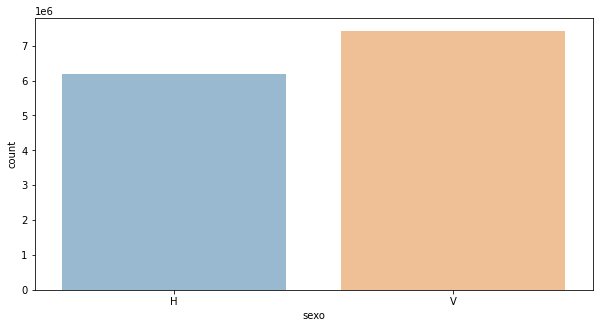

--------------------------------------------------
col :  age


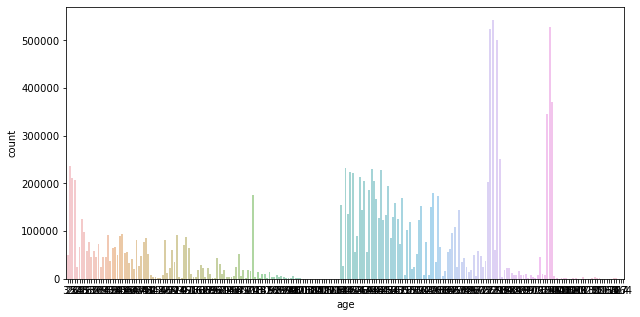

--------------------------------------------------
col :  fecha_alta


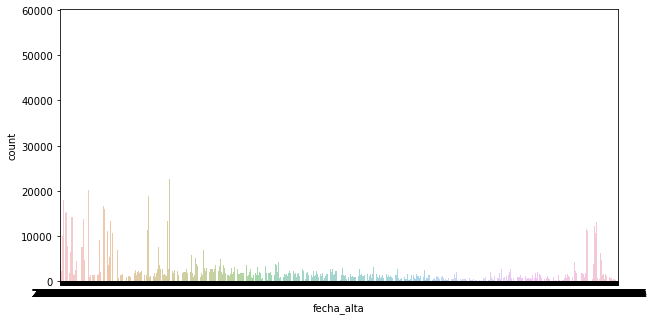

--------------------------------------------------
col :  ind_nuevo


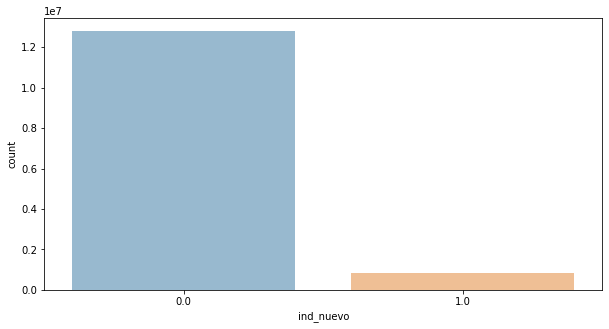

--------------------------------------------------
col :  antiguedad


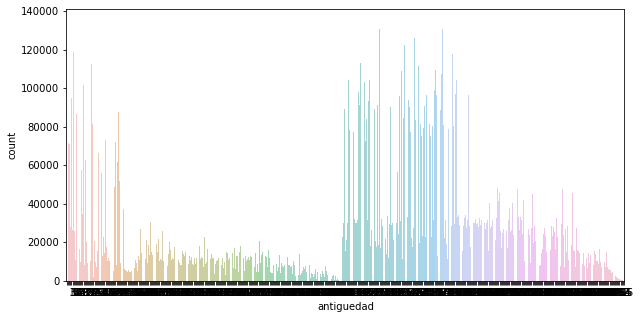

--------------------------------------------------
col :  indrel


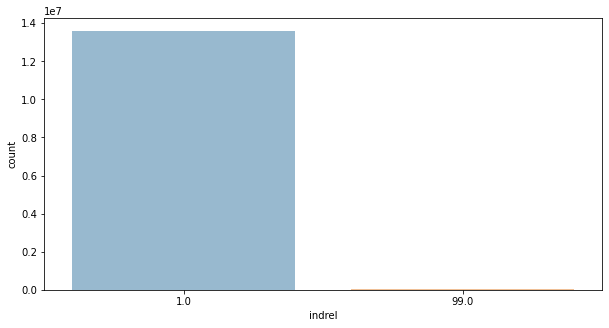

--------------------------------------------------
col :  ult_fec_cli_1t


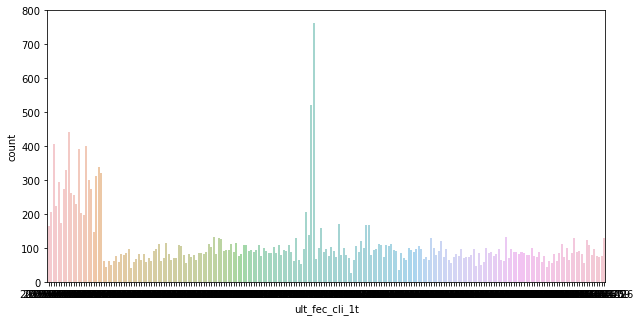

--------------------------------------------------
col :  indrel_1mes


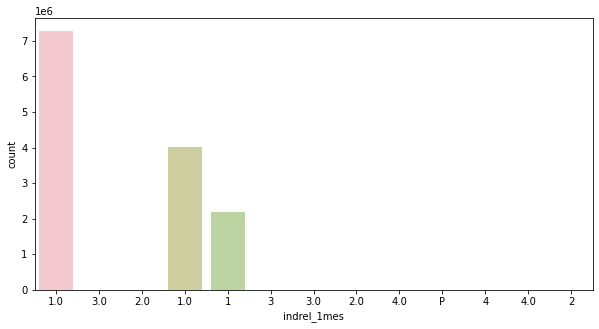

--------------------------------------------------
col :  tiprel_1mes


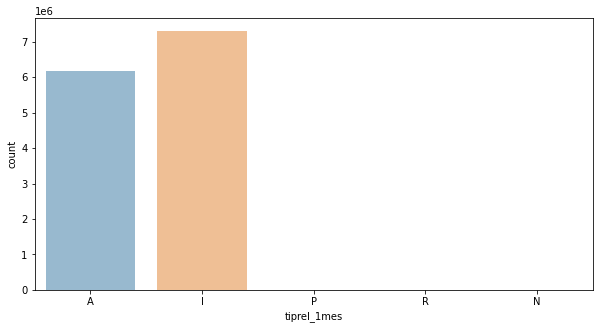

--------------------------------------------------
col :  indresi


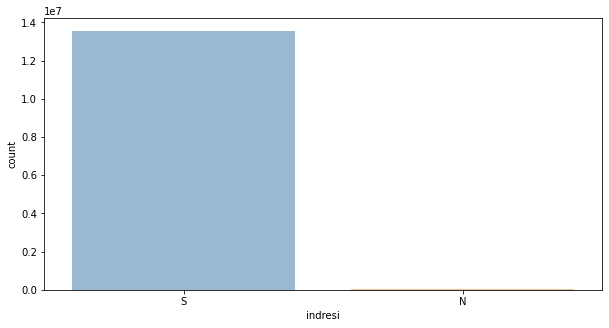

--------------------------------------------------
col :  indext


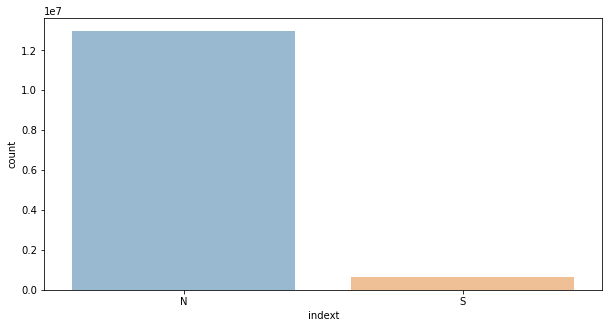

--------------------------------------------------
col :  conyuemp


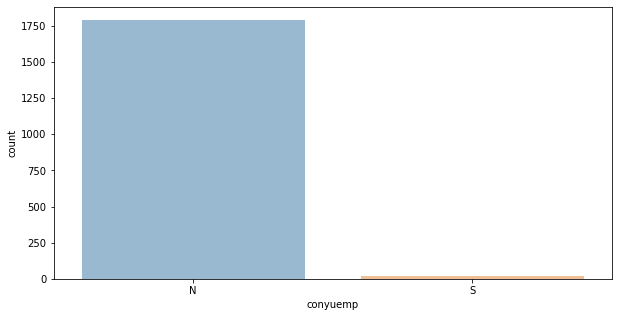

--------------------------------------------------
col :  canal_entrada


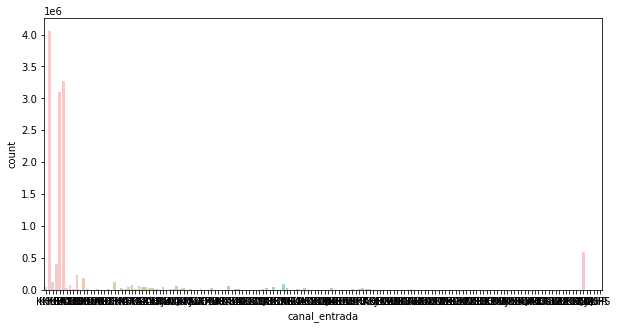

--------------------------------------------------
col :  indfall


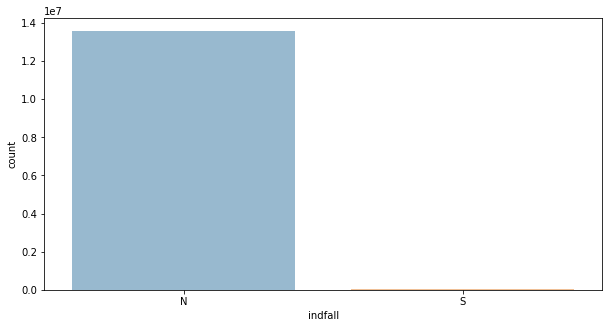

--------------------------------------------------
col :  tipodom


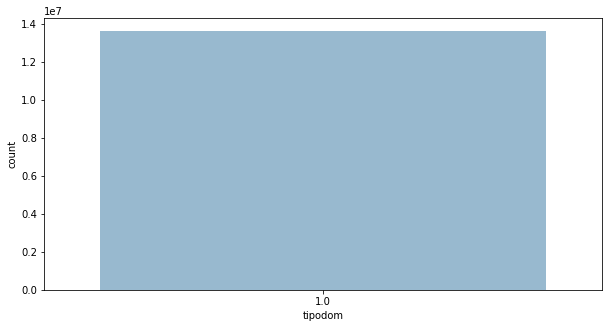

--------------------------------------------------
col :  cod_prov


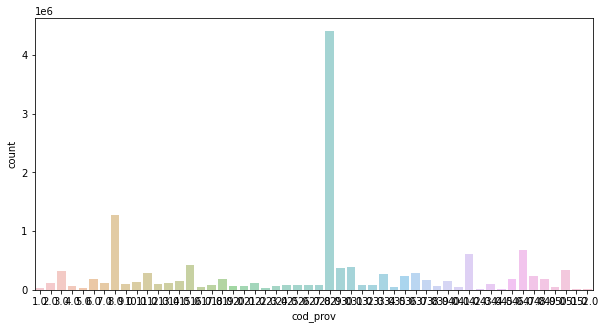

--------------------------------------------------
col :  nomprov


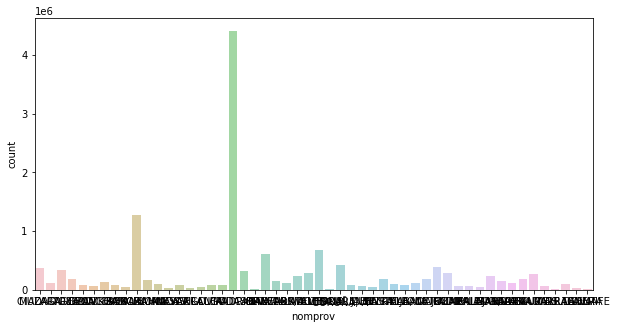

--------------------------------------------------
col :  ind_actividad_cliente


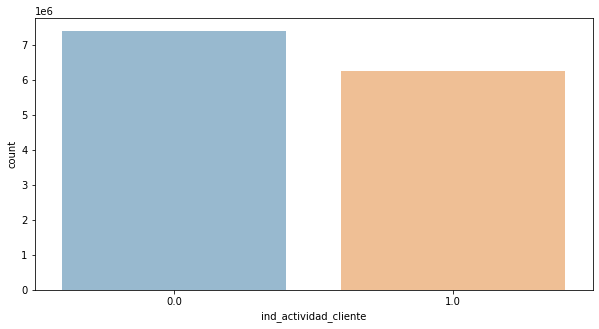

--------------------------------------------------
col :  segmento


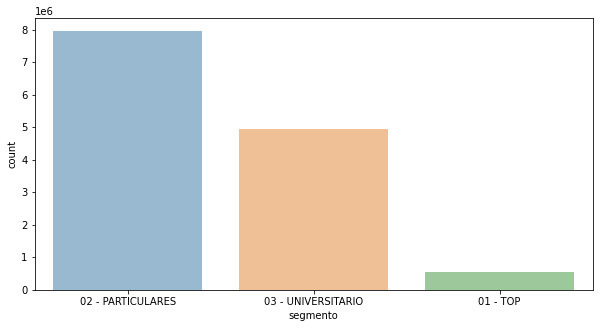

--------------------------------------------------
col :  ind_ahor_fin_ult1


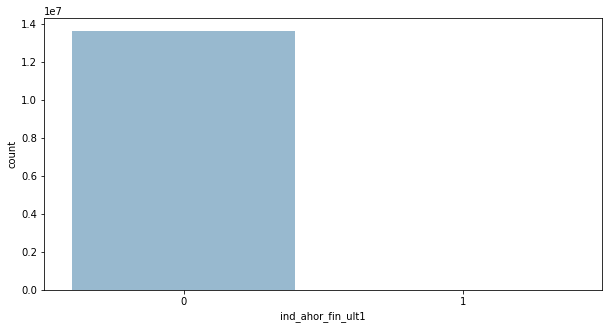

--------------------------------------------------
col :  ind_aval_fin_ult1


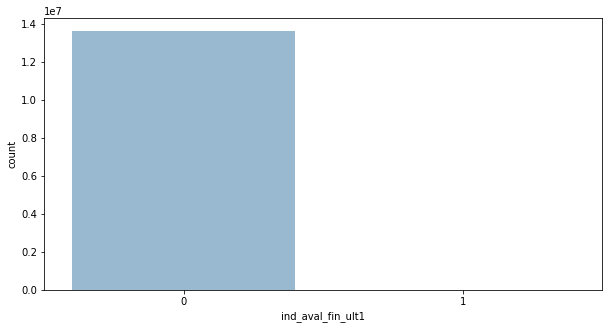

--------------------------------------------------
col :  ind_cco_fin_ult1


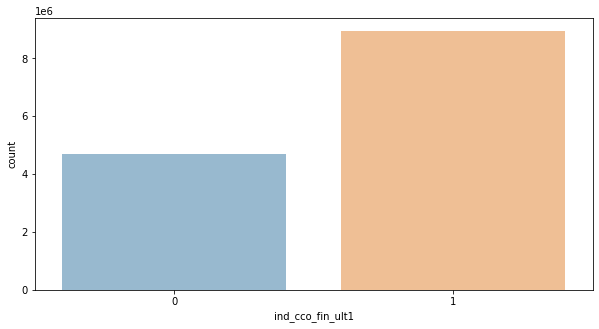

--------------------------------------------------
col :  ind_cder_fin_ult1


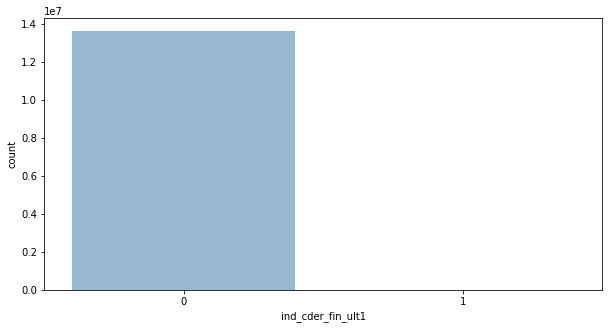

--------------------------------------------------
col :  ind_cno_fin_ult1


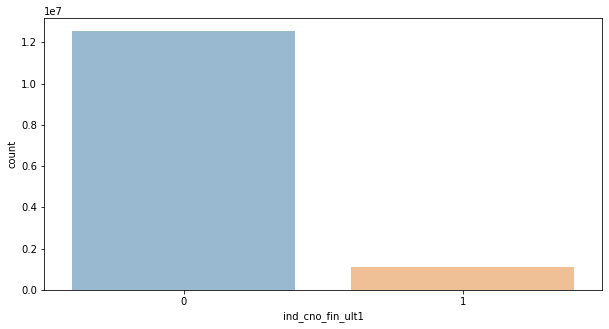

--------------------------------------------------
col :  ind_ctju_fin_ult1


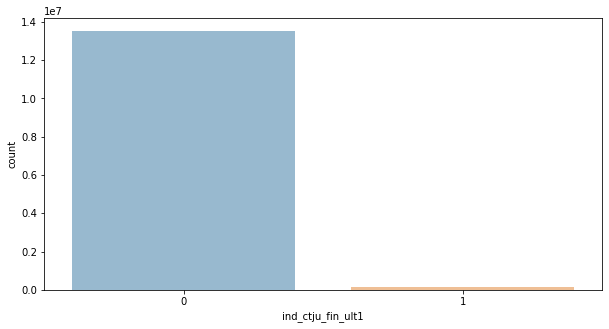

--------------------------------------------------
col :  ind_ctma_fin_ult1


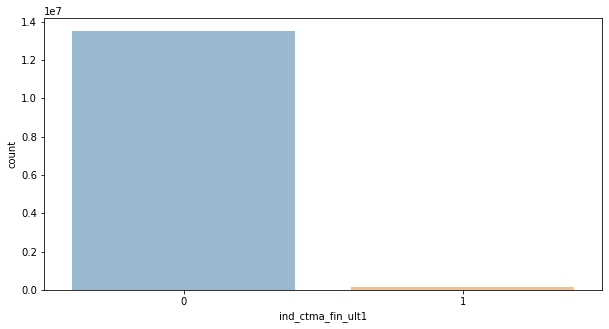

--------------------------------------------------
col :  ind_ctop_fin_ult1


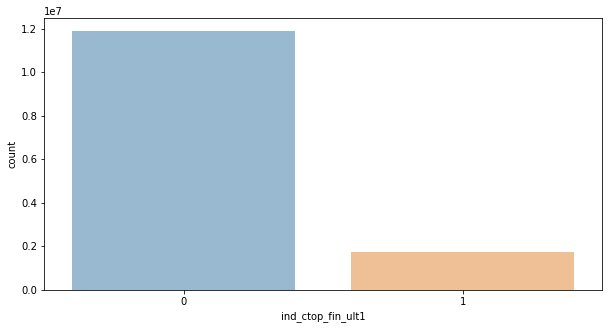

--------------------------------------------------
col :  ind_ctpp_fin_ult1


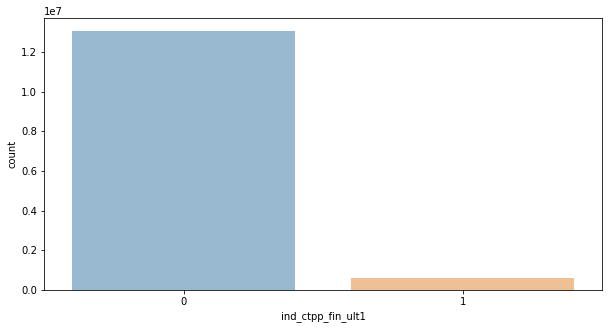

--------------------------------------------------
col :  ind_deco_fin_ult1


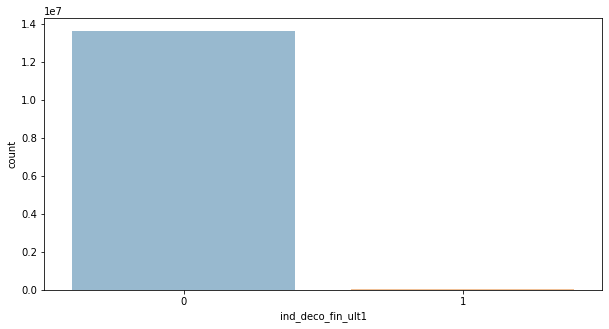

--------------------------------------------------
col :  ind_deme_fin_ult1


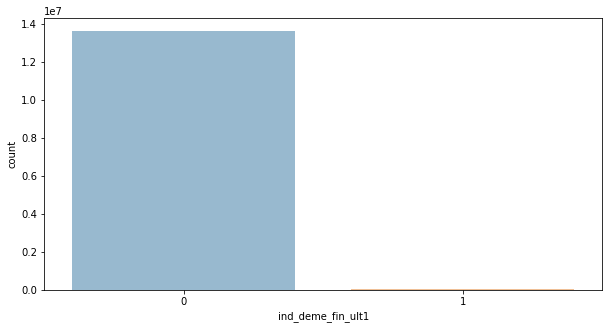

--------------------------------------------------
col :  ind_dela_fin_ult1


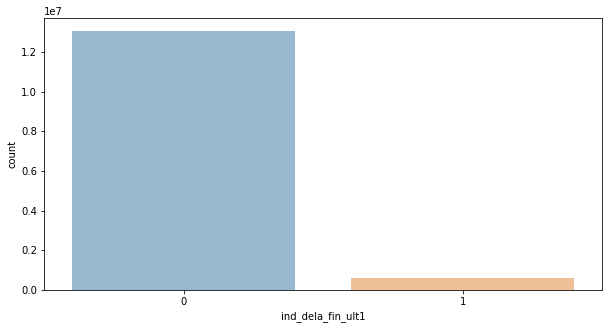

--------------------------------------------------
col :  ind_ecue_fin_ult1


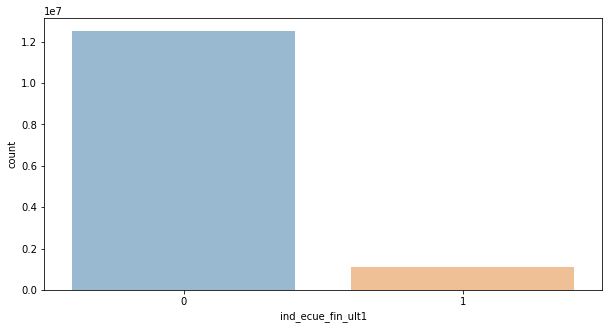

--------------------------------------------------
col :  ind_fond_fin_ult1


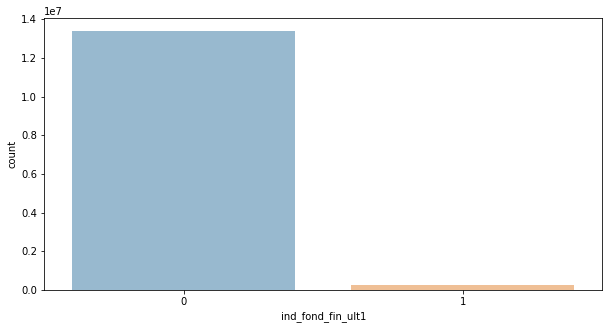

--------------------------------------------------
col :  ind_hip_fin_ult1


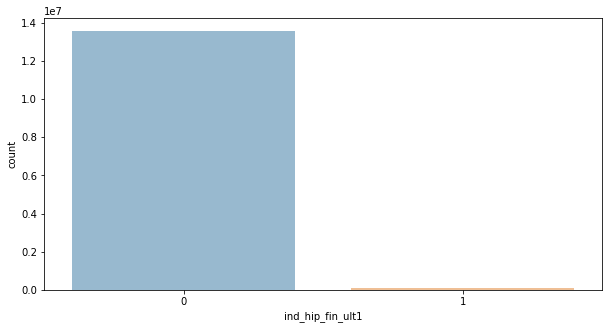

--------------------------------------------------
col :  ind_plan_fin_ult1


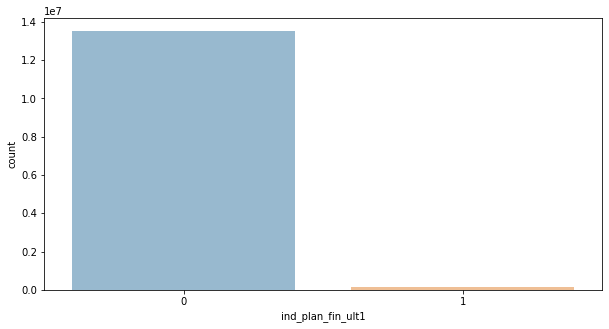

--------------------------------------------------
col :  ind_pres_fin_ult1


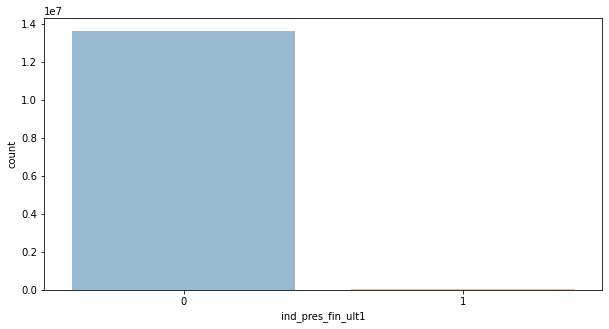

--------------------------------------------------
col :  ind_reca_fin_ult1


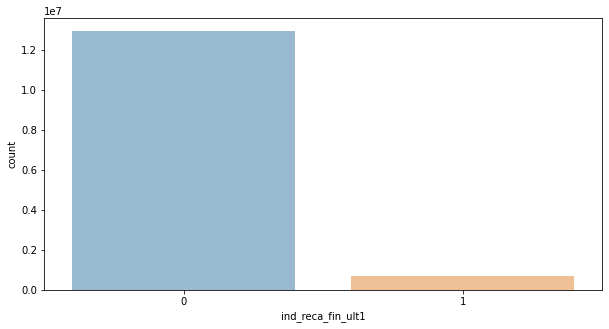

--------------------------------------------------
col :  ind_tjcr_fin_ult1


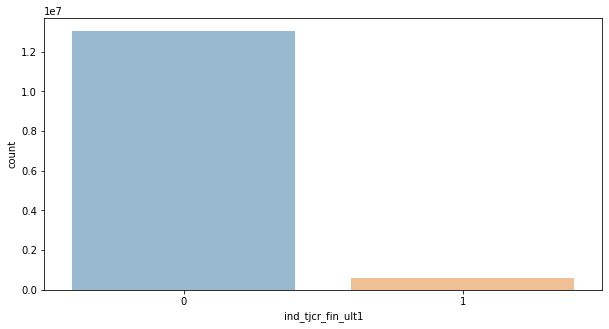

--------------------------------------------------
col :  ind_valo_fin_ult1


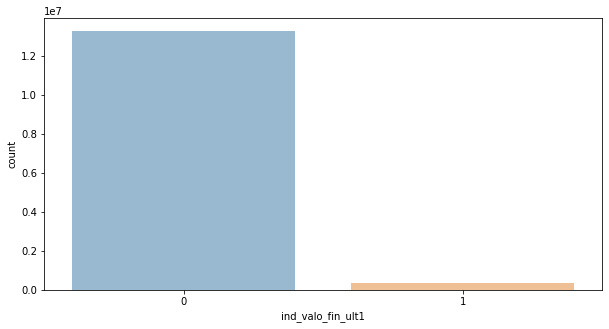

--------------------------------------------------
col :  ind_viv_fin_ult1


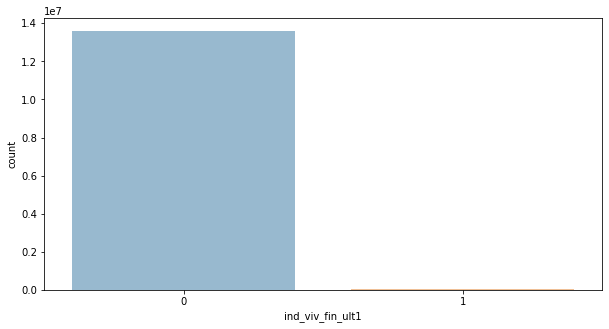

--------------------------------------------------
col :  ind_nomina_ult1


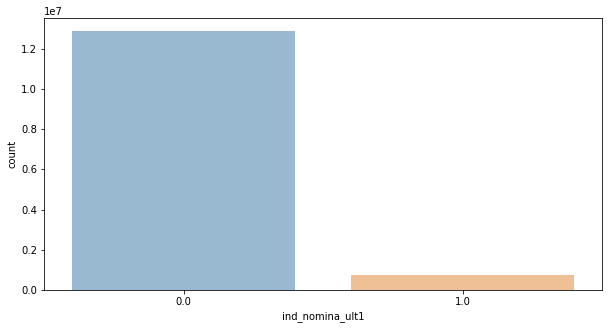

--------------------------------------------------
col :  ind_nom_pens_ult1


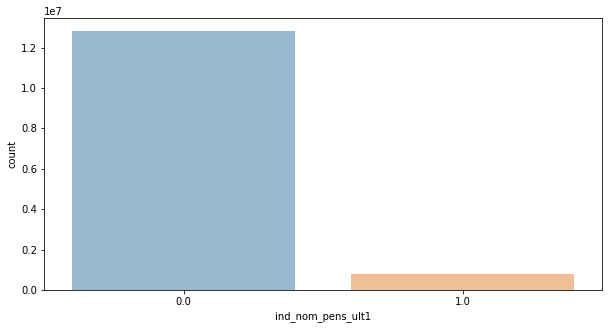

--------------------------------------------------
col :  ind_recibo_ult1


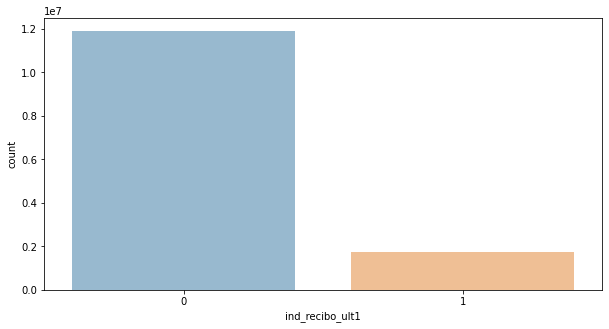

In [9]:
#고객 고유 식별번호는 의미가 없고, 총수입 renta는 고유값이 지나치게 많아 시간이 오래 걸리므로 스킵
skip_cols = ['ncodpers', 'renta']
for col in train.columns:
    if col in skip_cols:
        continue
    
    #보기 편하게 하기 위해서 영역 구분과 변수명을 출력한다.
    print('-'*50)
    print('col : ', col)
    
    #그래프 크기(figsize)를 설정한다
    f, ax = plt.subplots(figsize=(10,5))
    #seaborn을 사용한 막대 그래프를 생성한다.
    sns.countplot(x=col, data=train, alpha=0.5)
    #show() 함수를 통해 시각화 한다.
    plt.show()

fecha_dato : 첫 6개월은 고객 데이터 수가 비숫하며 15년 7월 부터 매달 고객 데이터가 증가한다.  
indrel_1mes : 월초 기준 고객 등급을 의미하는 해당 변수는 수치형과 범주형이 섞여있는 변수이다 하지만 1.0과 1이 다른 데이터처럼 표시가 된다. 이들을 모두 통일하는 작업을 거쳐야 한다.  
age, antiguedad 수치형 변수인 나이 분포가 예상과는 다르게 중간에 뚝 끊긴 모습을 보인다. 아마 object로 저장되어 앞선 indrel_1mes의 데이터와 비슷한 문제를 가진 것일 수 있다.  
fecha_alta : 95년 부터 16년 까지 폭 낣은 값을 가지는 날짜 데이터이다. 95년 부근과 최근 16년 부근이 높은 빈도를 보이는 것으로 보아, 장기 고객과 신규 고객의 비율이 높아 보임  
conyuemp 이번 경진대회 데이터에는 conyuemp와 같은 이진 분류로 구분되는 데이터가 많이 존재함

|Column Name|Description|데이터 타입|특징|변수 아이디어|
|------|-----|--------|-----|-----|
|fecha_dato|날짜|object|2015년 1~6월 까지는 데이터가 상대적으로 적음|년도/월별 데이터로 추출하기|
|ncodpers|고객 고유식별 번호|int64|데이터형테는 숫자지만 식별번호|식별번호는 학습에 사용할 수 없다
|ind_empleado|고용지표 A active, B ex employed, F filial, N not employee, P pasive|objcet|5개 값중 특정값이 99.9%차지|드랍하자
|pais_residencia|고객 거주 국가|objcet|알파벳 두글자로 생성된 국가 변수이지만 암호화가 되어 있기에 정확한 국가를 알기는 어려움 다만 ES빈도가 높은 것으로 보아 대략 스페인인것을 짐작할 수 있음|
|sexo|성별|object|상대적으로 여성이 많음|
|age|나이|object->int|분포 그래프가 중간에 끊긴다 숫자가 0~100크기로 정렬되어 있지 않음|데이터 타입 변환 필요
|fecha_alta|고객이 은행과 첫 계약을 체결한 날짜|object|1995~2016년도까지 장기고객도 존재한다. 과거 5년과 최근 1년에 빈도가높다
|ind_nuevo|신규 고객 지표(6개월 이내 신규 고객일 경우 값 = 1)|float64->int64|대부분이0,소수가 1인 변수|정수로 변환
|antiguedad|은행 거래 누적 기간(월)|object->int64||age변수와 비슷한 정제가 필요하다
|indrel|고객 등급 1(1등급) 99(해당 달에 고객 1등급이 해제되는 1등급 고객)|float64->int64|대부분이 1, 소수가 99인 변수|정수로 변환
|ult_fec_cli_1t|1등급 고객으로서 마지막 날짜|object|2015년7월~2016년5월|
|indrel_1mes|월초 기준 고객 등급 1:1등급 고객, 2:co-owner, P:potential, 3:former primary, 4:former co-owner)|ojbect->int64|1과 1.0이 다른 값으로 존재한다|'P'값을 정수로 변환하고 1,1.0이 동일한 1값을 갖도록 변환
|tiprel_1mes|월초 기준 고객 관계 유형 A (active), I (inactive), P (former customer),R (Potential)|object|A,I의 빈도가 높다.
indresi|거주지표 (S (Yes) or N (No) 고객의 거주 국가와 은행이 위치한 국가가 동일한가|object|S의 빈도가 높다.
indext|외국인 지표 (S (Yes) or N (No) 고객이 태어난 국가와 은행이 위치한 국가 동일 여부|object|N의 빈도가 높다.
conyuemp|배우자 지표 1 : 은행 직원을 배우자로 둔 고객|object|N의 빈도가 높다.
canal_entrada|고객 유입 채널|object|알파벳 세글자로 암호화된 유입 경로 변수이다|상위 5개가 대부분을 차지한다.
indfall| 고객 사망 여부 S(Yes) N(No)|object
tipodom| 주소 유형1, primary address|float64|모든 값이 1 의미가 없는 변수 | 드랍
cod_prov|지방코드(주소기반)|float64->int64|1~52사이의 값을 고르게 가지는 값이다. 다만 상위 5개의 값이 대부분을 차지|소수일 필요가 없으니 정수로 변환
nomprov|지방이름|object|스페인 지역 이름을 타나낸다. 지방코드칼럼과 동일한 변수로 추측
ind_actividad_cliente|활발성지표 (1, active customer; 0, inactive customer)|float64->int64|0과 1의 값을 가지는 변수 | 정수로 변환
renta|고객 총수입|float64->int64|10^3~2\*10^7의 값을 가지며 정확한 단위를 알 수 없다(달러 혹은 유로)| 정수로 변환
segmento|분류01 - VIP, 02 - 개인 03 - 대졸자|object|개인 빈도가 가장 높으나 대학생 비율이 생각보다 높다. 대학가 주변일 수 있다

### 시계열 데이터 시각화

단순한 히스토그램이나 막대그래프로는 데이터의 의미를 도출하는 것이 제한적이고 힘들기때문에 다른 시각화 방법을 시도
가장 먼저 월별 금융 제품 보유 데이터를 누적 막대 그래프로 시각화하기

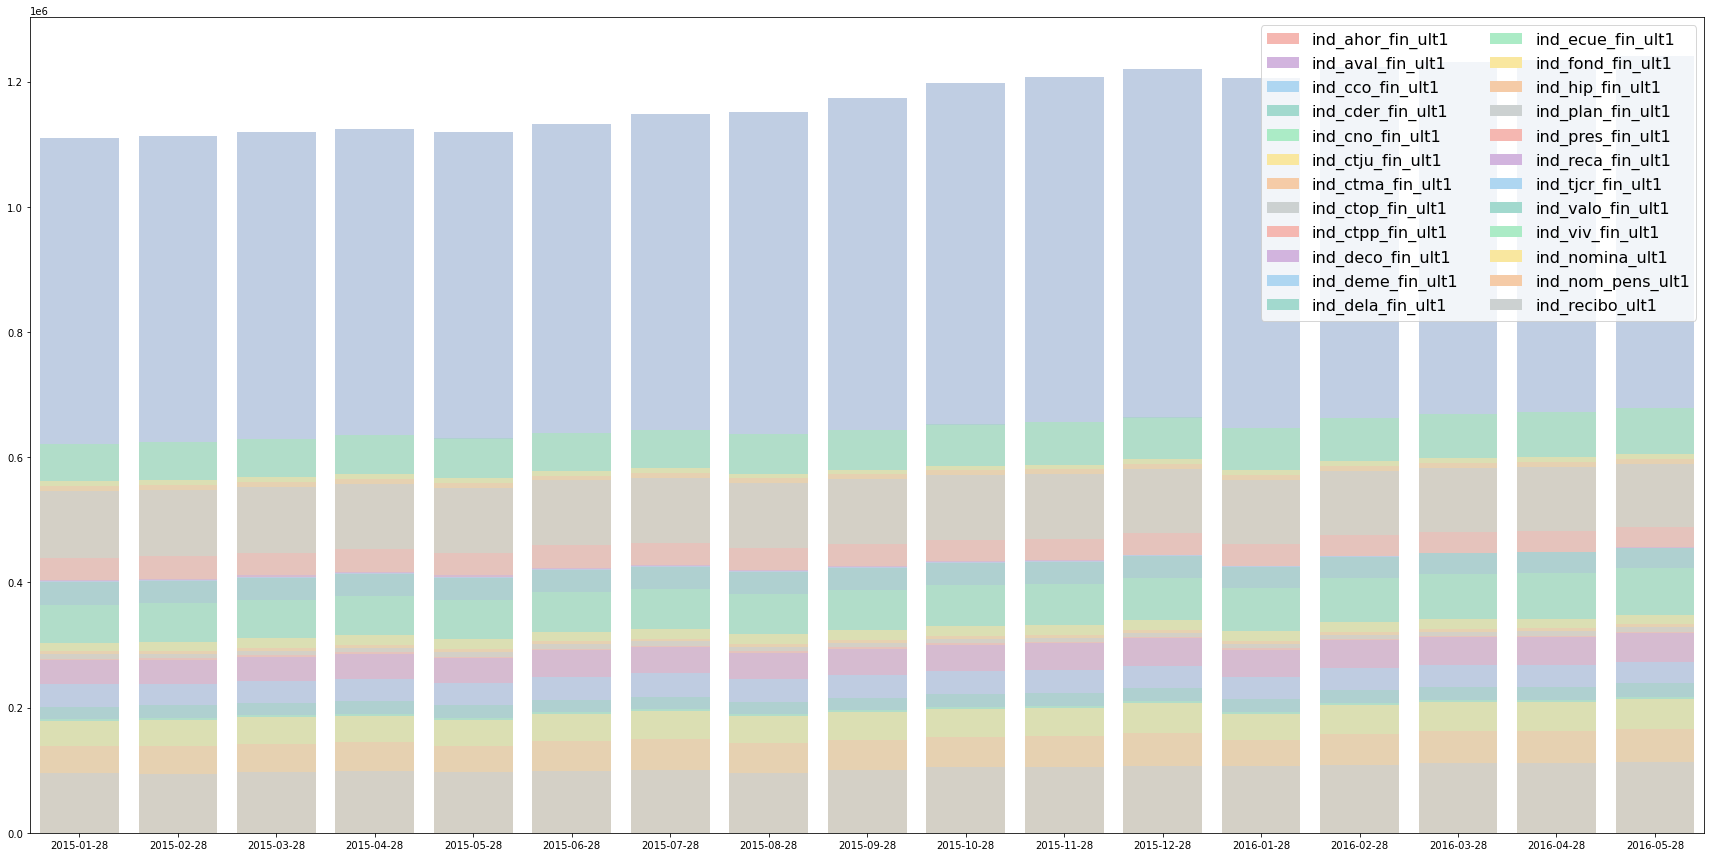

In [10]:
# 날짜 데이터를 기준으로 분석하기 위하여, 날짜 데이터 별도 추출
months =  train['fecha_dato'].unique().tolist()
# 제품 변수 24개를 추출
label_cols = train.columns[24:].tolist()
label_over_time = []

for i in range(len(label_cols)):
    # 매월, 각 제품의 총합을 groupby( .. ) .agg('sum' ）으로 계산하여 정한다.
    label_sum = train.groupby(['fecha_dato'])[label_cols[i]].agg('sum')
    # 제품별로 총합을 groupby( .. ) .agg('sum' ）으로 계산하여 정한다.
    label_over_time.append(label_sum.tolist())

label_sum_over_time = []
for i in range(len(label_cols)):
# 누적 막대 그래프 시각화를 위해, n 번째 제품의 총합을 1 ~ n 번째 제품의 총합으로 만든다.
# np.asarray(label_over_time[i:]).sum(axis=0) : 제품 행 / 날짜열 구조 -> 행방향 합계 -> 날짜별 제품간의 누적합
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))

#시각화를 위해서 색깔을 지정하기
color_list = ['#F5B7B1','#D2B4DE','#AED6F1','#A2D9CE','#ABEBC6','#F9E79F','#F5CBA7','#CCD1D1']

#그림 크기를 사전에 정의한다.
f, ax = plt.subplots(figsize=(30,15))
for i in range(len(label_cols)):
    #24개 제품에 대해서 히스토그램을 그린다.
    #x축에는 월데이터, y축에는 누적 총합, 색상은 8개를 사용하여 그림의 알파값은 0.7로 조정
    sns.barplot(x=months, y=label_sum_over_time[i],color=color_list[i%8], alpha=0.7)

#우측 상단에 Legned를 추가한다.
plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor='none') for i in range(len(label_cols))], label_cols, loc=1, ncol=2, prop={'size':16})

월별 금융 제품 보유 데이터를 누적 막대 그래프로 시각화하기: 월별 상대값으로 시각화  
매달 달라지는 금융제품 보유값에 무관한 시각화를 위해 상대값으로 시각화

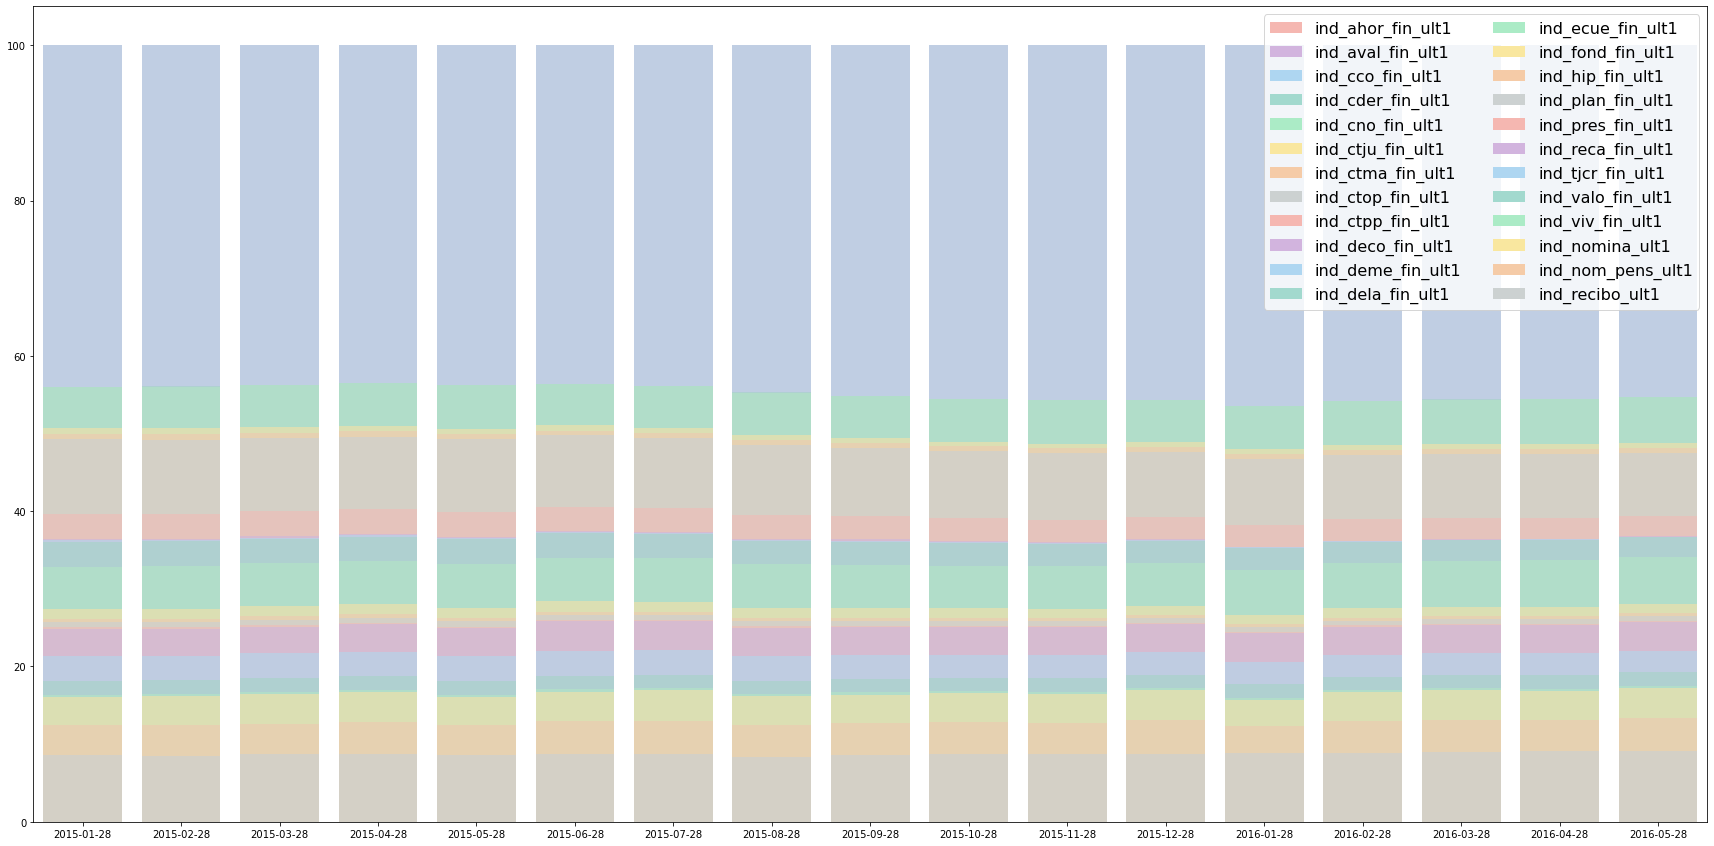

In [11]:
# label_sum_over_time의 값을 퍼센트 단위로 변환한다. 월마다 최댓값으로 나누고 100을 곱해준다.
label_sum_percent = ( label_sum_over_time / ( 1.* np.asarray(label_sum_over_time).max(axis=0) ) ) * 100

# 앞선 코드와 동일한, 시각화 실행 코드이다.
f, ax = plt.subplots(figsize=(30,15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_percent[i], color=color_list[i%8], alpha=0.7 )

plt.legend(
    handles = [plt.Rectangle((0,0),1,1,facecolor=color_list[i%8], edgecolor='none') 
    for i in range(len(label_cols))], labels = label_cols, loc=1, ncol=2, prop={'size':16}
) # handles / labels 설명: https://kongdols-room.tistory.com/87

당좌 예금, ("ind_cco fin ult1")의 보유량은 계절에 상관없이 꾸준히 높음  
다른 제품의 비율도 1년 6개월 간 큰 변화 없이 꾸준함  
1년 6개월 기간 중, 눈에 띄는 변화 혹은 패턴 없음  

보통 예측을 위해 제공되는 변수 (24개 고객 변수) 보다는, 실제 예측해야하는 변수 (24개의 금융 제품 변수)를 올바르게 분석하여, 이해도를 높이는 것이 좋은 머신러닝 모델을 구축하는데 도움이 됨  

 
24개 금융 제품에 대한 '신규 구매 데이터를 생성하기  
필요한 시각화는 '신규 구매' 이지만, 주어진 데이터는 월별 보유'  
의도하는 바를 시각화하기 위해 주어진 데이터에서'신규 구매 정보'를 추출하는 별도 과정 필요  

In [12]:
# 제품 변수를 prods에 list형태로 저장한다.
prods = train.columns[24:].tolist()

# 날짜를 숫자로 변환하는 함수이다. 2015-01-28은 1, 2016-06-28은 18로 변환된다
def date_to_int(str_date):
    Y, M, D = [int(a) for a in str_date.strip().split("-")] 
    int_date = (int(Y) - 2015) * 12 + int(M)
    return int_date

# 날짜를 숫자로 변환하여 int_date에 저장한다
train['int_date'] = train['fecha_dato'].map(date_to_int).astype(np.int8)

# 데이터를 복사하고, int_date 날짜에 1을 더하여 lag를 생성한다. 변수명에 _prev를 추가한다.
df_lag = train.copy()
df_lag.columns = [col + '_prev' if col not in ['ncodpers', 'int_date'] else col for col in train.columns ]
df_lag['int_date'] += 1

# 원본 데이터와 lag 데이터를 ncodper와 int_date 기준으로 합친다. Lag 데이터의 int_date는 1 밀려 있기 때문에, 저번 달의 제품 정보가 삽입된다.
df_trn = train.merge(df_lag, on=['ncodpers','int_date'], how='left')

# 메모리 효율을 위해 불필요한 변수를 메모리에서 제거한다
#del train, df_lag

In [13]:
# 저번 달의 제품 정보가 존재하지 않을 경우를 대비하여 0으로 대체한다.
for prod in prods:
    prev = prod + '_prev'
    df_trn[prev].fillna(0, inplace=True)
df_trn.fillna(-99, inplace=True)

# 원본 데이터에서의 제품 보유 여부 - lag 데이터에서의 제품 보유 여부를 비교하여 신규 구매 변수 padd를 구한다.
for prod in prods:
    padd = prod + '_add'
    prev = prod + '_prev'
    df_trn[padd] = (( df_trn[prod] == 1 ) & ( df_trn[prev] == 0 )).astype(np.int8)

# 신규 구매 변수만을 추출하여 labels에 저장한다.
add_cols = [prod + '_add' for prod in prods ]
labels = df_trn[add_cols].copy()
labels.columns = prods
labels.to_csv('labels.csv', index=False)

필요한 시각화는 '신규 구매' 이지만, 주어진 데이터는 월별 보유'  
의도하는 바를 시각화하기 위해 주어진 데이터에서'신규 구매 정보'를 추출하는 별도 과정 필요

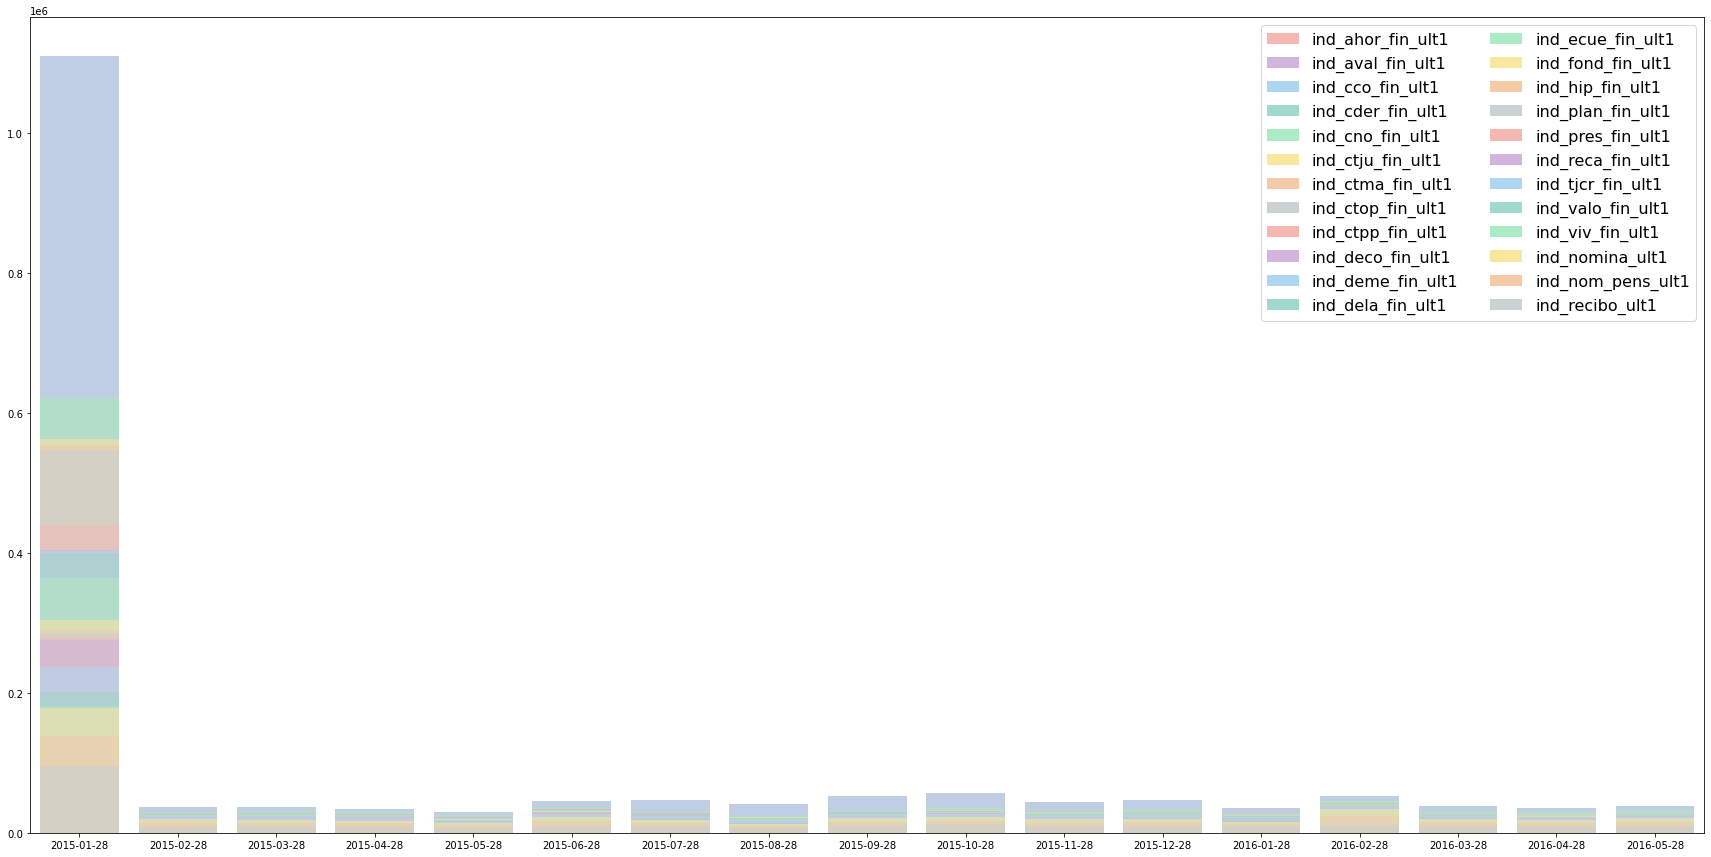

In [14]:
labels = pd.read_csv('labels.csv').astype(int)
fecha_dato = pd.read_csv('train_ver2.csv',usecols=['fecha_dato'])

labels['date'] = fecha_dato.fecha_dato
months = np.unique(fecha_dato.fecha_dato).tolist()
label_cols = labels.columns.tolist()[:24]

label_over_time = []
for i in range(len(label_cols)):
    label_over_time.append(labels.groupby(['date'])[label_cols[i]].agg('sum').tolist())
    
label_sum_over_time = []
for i in range(len(label_cols)):
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))
color_list = ['#F5B7B1','#D2B4DE','#AED6F1','#A2D9CE','#ABEBC6','#F9E79F','#F5CBA7','#CCD1D1']

f, ax = plt.subplots(figsize=(30,15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_over_time[i], color=color_list[i%8], alpha=0.7 )

plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor='none') for i in range(len(label_cols))], label_cols, loc=1, ncol = 2, prop={'size': 16})

첫 달인 '2015-05-28' 신규 구매 숫자가 압도적으로 많은 이유: 데이터의 첫 달에는 모든 보유 제품이 신규 구매로 인식되기 때문  
다른 달의 신규 구매 횟수를 더 자세히 보기 위해 상대값 기준으로 다시 시각화

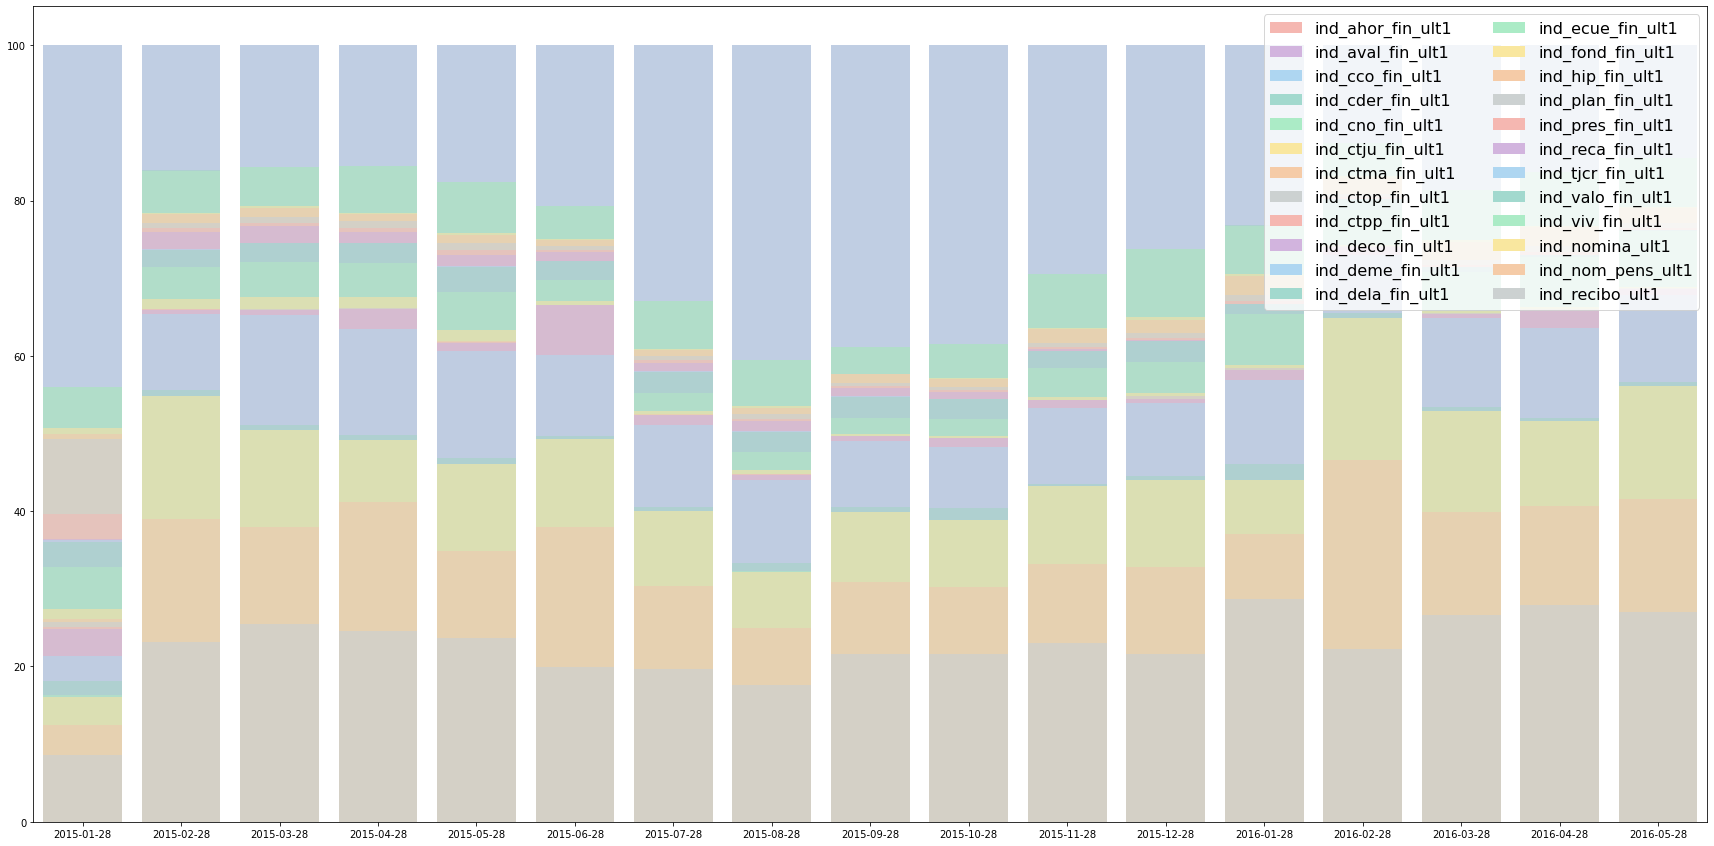

In [15]:
label_sum_percent = (label_sum_over_time / (1.*np.asarray(label_sum_over_time).max(axis=0))) * 100

f, ax = plt.subplots(figsize=(30,15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_percent[i], color=color_list[i%8], alpha=0.7)

plt.legend(
    [plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor='none') for i in range(len(label_cols))], label_cols, loc=1, ncol=2, prop={'size':16}
)

당좌 예금(ind_cco_fin_ult1, 위에서 첫 번째 영역: ①)은 8월 여름에 가장 높은 값을 가지며, 겨울에는 축소되는 계절 추이를 보인다.  
단기 예금(ind deco fin_ult1, 위에서 다섯 번째 그래프에서 ②영역)은 2015-06-28에 특이하게 높은 값을 가지며, 다른 시기에는 값이 매우 낮다.  
급여, 연금 (ind_nomina_ult1, ind_nom pens_ult1)은 당좌 예금과 반대로 8월 여름에 가장 낮은 값을 가지며 2016-02-28 겨울에 가장 높은 값을 가지는 추세이다.  
신규 구매 빈도가 가장 높은 상위 5개 금융 제품은 당좌 예금, 신용 카드, 급여, 연금 그리고 직불 카드(ind_cco_fin_ult1, ind tjcr_fin_ulti, ind_nomina_ult1, ind_nom pens_ulti, ind_recibo fin_ult101C7.  
 
데이터가 계절성을 띈다는 것은, 훈련 데이터를 몇 월로 지정하는가에 따라, 머신러닝 모델의 결과물이 많이 달라질 수 있다는 것을 의미한다.  
계절의 변동성을 모델링하는 하나의 일반적인 모델을 구축할 것인지, 계절에 따라 다수의 모델을 구축하여 혼합해서 사용할지를 결정해야한다.

### 탐색적 데이터 분석은 크게 두 가지 작업으로 분류할 수 있다.
1) 기초 통계를 통하여 Raw Data를 분석하는 방법과 2) 시각화를 통해 Raw Data를 분석하는 방법이다.  

 
pandas가 지원하는 기초 통계 함수  
pandas.read_csv('파일명') : CSV 파일을 메모리에 불러온다.  
DataFrame.head() : 데이터의 첫 5줄을 미리보기한다.  
DataFrame.tail() : 데이터의 마지막 5줄을 미리보기한다.  
DataFrame.info() : 데이터 프레임에 대한 정보를 소개한다.  
DataFrame.shape : 데이터 프레임의 크기를 확인한다.  
DataFrame.mean() : 변수별 평균값을 구한다.  
DataFrame.std() : 변수별 표준편차값을 구한다.  
DataFrame.isnull() : 결측값 여부를 확인한다.  

시각화를 위한 기초 함수  
plt.plot(x) : 1-D, 2-D 데이터 선 그래프를 시각화한다.  
plt.hist(x) : 막대 그래프를 시각화한다.  
plt.scatter(x, y) : 산점도를 시각화한다.  
plt.matshow(array) : 2-D 데이터를 heatmap 그래프로 시각화한다.  
DataFrame.plot() : 변수를 선 그래프로 시각화한다.  
DataFrame.plot.hist() : 막대 그래프를 시각화한다.  
DataFrame.plot.box() : Box 그래프를 시각화한다.  
DataFrame.plot.kde() : 밀도 그래프를 시각화한다.

### 훈련 / 테스트 데이터 설명

총 1년 6개월치(2015-01-28 ~ 2016-06-28) 월별 고객 데이터가 제공된다.  
첫 1년 5개월치(2015-01-28 ~ 2016-05-28) 데이터는 훈련 데이터이며, 훈련 데이터에는 익명화된 24개의 고객 변수와 24개의 금융 제품 보유 현황에 대한 정보가 포함되어 있다.  
경진대회 데이터를 일차적으로 살펴본 결과를 다음과 같이 요약할 수 있다.  
'age', 'antiguedad, indrel 1mes'등의 수치 변수가 object로 표현되어 있어 올바르게 인식되지 않는다. 데이터 정제 작업이 필요하다.  
대부분의 고객 변수에 결측값이 존재한다. 수치형/범주형 변수의 결측값은 기존 변수에 없는 값 (흔히 0, -1 등을 사용)으로 흔히 대체한다. 날짜 변수는 어느 날짜로 대체 해야할지 고민이 필요하다.  
두 개의 고유 값을 가지는 이진변수들이 많이 존재한다. 메모리의 효율을 극대화하기 위하여 int64의 0,1 값으로 변환하자  
고객 등급, 고객 관계 유형 등 변수의 각 값이 무엇을 의미하는지 구체적인 설명이 부족하다. 예를 들어 월초 기준 고객 등급을 의미하는 indrel lmes의 '3 : former primary' 값이 정확히 무엇을 의미하는지 자세한 설명이 생략되어 있다.  
여러분이 예측하고자 하는 값은 금융 제품 보유 여부가 아닌, 신규 구매이다. 그러므로 제공된 데이터에서 '신규 구매' 여부를 별도로 추출해야 하며, 평가 기준도 '신규 구매' 기준으로 진행되어야 한다(labels.csv).  
신규 구매 데이터가 계절성을 띄고 있다. 단일 모델로 모든 데이터를 학습시킬지, 특정 월만 추출해서 학습을 진행할지 선택이 필요하다. 다수의 모델을 서로 다른 계절을 기반으로 학습하는 것도 또 하나의 방법이다.  
마지막 한 달치(2016-06-28) 데이터는 테스트 데이터로 사용되며, 24개의 고객 변수는 동일하게 제공되나, 금융 제품 보유 현황에 관련한 값이 존재하지 않는다.  

- Baseline 모델은 일반적인 머신러닝 파이프라인의 모든 과정을 포함하는 가장 기초적인 모델이다
- Tabular 데이터를 다루는 캐글 경진대회에서의 머신러닝 파이프라인의 일반적인 순서는 다음과 같다
 
① 데이터 전처리 → ② 피처 엔지니어링 → ③ 머신러닝 모델 학습 → ④ 테스트 데이터 예측 및 캐글 업로드

Baseline 모델 구축을 위하여 데이터 전처리 과정에서는 다음 작업을 수행한다.  

제품 변수의 결측값을 0 으로 대체한다. 제품 보유 여부에 대한 정보가 없으면, 해당 제품을 보유하고 있지 않다고 가정한다.  
훈련 데이터와 테스트 데이터를 통합한다. 훈련 데이터와 테스트 데이터는 날짜 변수(fecha dato)로 쉽게 구분이 가능하다. 동일한 24개의 고객 변수를 공유하고 있으며, 테스트 데이터에 없는 24개의 제품 변수는 0으로 채운다.  
범주형, 수치형 데이터를 전처리한다.  
범주형 데이터는 factorize()를 통해 Label Encoding을 수행한다.  
데이터 타입이 object 로 표현되는 수치형 데이터에서는 .unique()를 통해 특이값들을 대체하거나 제거하고, 정수형 데이터로 변환한다.  
추후, 모델 학습에 사용할 변수 이름을 features 리스트에 미리 담는다.

In [16]:
import pandas as pd
import numpy as np
import xgboost as xgb

np.random.seed(2018)

# 데이터를 불러온다.
trn = pd.read_csv('train_ver2.csv')
tst = pd.read_csv('test_ver2.csv')

## 데이터 전처리 ##
# 제품 변수를 별도로 저장해 놓는다.
prods = trn.columns[24:].tolist()

# 제품 변수 결측값을 미리 0으로 대체한다.
trn[prods] = trn[prods].fillna(0.0).astype(np.int8)

# 훈련 데이터와 테스트 데이터를 통합한다. 테스트 데이터에 없는 제품 변수는 0으로 채운다.
for col in trn.columns[:24]:
    tst[col] = 0
df = pd.concat([trn, tst], axis=0)

# 학습에 사용할 변수를 담는 list이다.
features = []
# 범주형 변수를 .factorize() 함수를 통해 label encoding한다.
categorical_cols = ['ind_empleado', 'pais_residencia', 'sexo', 'tiprel_1mes', 'indresi', 'indext', 'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'nomprov', 'segmento']

for col in categorical_cols:
    df[col], _ = df[col].factorize(na_sentinel=-99)

features += categorical_cols

# 수치형 변수의 특이값과 결측값을 -99로 대체하고, 정수형으로 변환한다.
df['age'].replace(' NA', -99, inplace=True)
df['age'] = df['age'].astype(np.int8)

df['antiguedad'].replace('     NA', -99, inplace=True)
df['antiguedad'] = df['antiguedad'].astype (np.int8)

df['renta'].replace('         NA', -99, inplace=True)
df['renta'].fillna(-99, inplace=True)
df['renta'] = df['renta'].astype(float).astype(np.int8)

df['indrel_1mes'].replace('P', 5, inplace=True)
df['indrel_1mes'].fillna(-99, inplace=True)
df['indrel_1mes'] = df['indrel_1mes'].astype(float).astype(np.int8)


# 학습에 사용할 수치형 변수를 features에 추가한다.
features += ['age', 'antiguedad', 'renta', 'ind_nuevo', 'indrel', 'indrel_1mes', 'ind_actividad_cliente']

C:\Users\dhjun\.conda\envs\DataScience\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\dhjun\.conda\envs\DataScience\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### 피처 엔지니어링
 
피처 엔지니어링 단계에서는 머신러닝 모델 학습에 사용할 파생 변수를 생성한다.  
Baseline 모델에서는 전체 24개의 고객 변수와, 4개의 날짜 변수 기반 파생 변수 그리고 24개의 lag-1 변수를 사용한다.  
고객이 첫 계약을 맺은 날짜를 의미하는 fecha alta에서 연도 정보를  
고객이 마지막으로 1등급이었던 날짜를 의미하는 ult_fec_cli lt 변수에서 월 정보를 추출한다.  
 
그 외에도 날짜 변수를 활용한 파생 변수는 다양하다.  
예를 들어, 두 개의 날짜 변수 간의 차이값을 파생 변수로 생성한다거나,  
졸업식이나 방학 등의 특별한 날짜까지의 거리를 수치형 변수로 생성할 수 있다.  
결측값은 임시로 -99로 대체한다.  
사이킷 런에서 제공하는 머신러닝 모델은 결측값을 입력값으로 받지 않고 실행 에러가 발생하지만,  
xgboost 모델에서는 결측값도 정상적인 입력값으로 받는다.  
데이터가 결측되었다는 것도 하나의 정보로 인식하고 모델 학습에 활용되지만, 이번 장에서는 결측값을 -99로 설정한다.  
시계열 데이터에서는 고객의 과거 데이터를 기반으로 다양한 파생 변수를 생성할 수 있다.  
예를 들어, 고객의 나이가 최근 3개월 동안 변동이 있었는지(즉, 3개월 안에 생일을 맞이했는지)를 이진 변수로 생성하거나,  
한 달 전에 구매한 제품에 대한 정보를 변수로 사용할 수 있고, 최근 6개월 평균 월급을 계산할 수도 있다.  
이번 경진대회에서는 N개월 전에 금융 제품을 보유하고 있었는지 여부를 나타내는 lag 변수가 좋은 파생 변수로 작용했다.  
24개의 금융 제품 변수에 대하여 1개월 전, 2개월 전, 3개월 전 보유 여부를 현재 고객의 데이터로 활용하는 것이다.  
 
Baseline모델에서는 1개월 전 정보만을 가져다 사용하는 lag-1 변수를 사용한다. lag-5 변수까지 독자가 구현하여, 성능 개선을 직접 확인해 보는 것을 권장한다.  

In [17]:
# (피처 엔지니어링) 두 날짜 변수에서 연도와 월 정보를 추출한다.
# 교재오류 수정: x.__class__ is float => (x.__class__ == float) | (x.__class__ == int)
df['fecha_alta_month']= df['fecha_alta'].map(lambda x: 0.0 if (x.__class__ == float) | (x.__class__ == int) else float(x.split('-')[1])).astype(np.int8)
df['fecha_alta_year']= df['fecha_alta'].map(lambda x: 0.0 if (x.__class__ == float) | (x.__class__ == int) else float(x.split('-')[0])).astype(np.int16)

features += ['fecha_alta_month', 'fecha_alta_year']

df['ult_fec_cli_1t_month']= df['ult_fec_cli_1t'].map(lambda x: 0.0 if (x.__class__ == float) | (x.__class__ == int) else float(x.split('-')[1])).astype(np.int8)
df['ult_fec_cli_1t_year']= df['ult_fec_cli_1t'].map(lambda x: 0.0 if (x.__class__ == float) | (x.__class__ == int) else float(x.split('-')[0])).astype(np.int16)

features += ['ult_fec_cli_1t_month', 'ult_fec_cli_1t_year']

# 그 외 변수의 결측값은 모두 -99로 대체한다.
df.fillna(-99, inplace=True)
# (피처 엔지니어링) lag-1 데이터를 생성한다.
# 날짜를 숫자로 변환하는 함수이다. 2015-01-28은 1, 2016-06-28은 18로 변환된다.

def date_to_int(str_date):
    if str_date.__class__ != int:
        Y, M, D = [ int(a) for a in str_date.strip().split("-") ]
        int_date = (int(Y) - 2015) * 12 + int(M)
        return int_date
    else:
        return str_date

# 날짜를 숫자로 변환하여 int_date에 저장한다.
df['int_date'] = df['fecha_dato'].map(date_to_int).astype(np.int8)

# 데이터를 복사하고, int_date 날짜에 1을 더하여 lag를 생성한다. 변수명에 _prev를 추가한다.
df_lag = df.copy()
df_lag.columns = [col + '_prev' if col not in ['ncodpers', 'int_date'] else col for col in df.columns]
df_lag['int_date'] += 1
# 원본 데이터와 lag 데이터를 ncodper와 int_date 기준으로 합친다. 
# lag 데이터의 int_date는 1 밀려 있기 때문에, 저번 달의 제품 정보가 삽입된다.
df_trn = df.merge(df_lag, on=['ncodpers', 'int_date'], how='left')

# 메모리 효율을 위해 불필요한 변수를 메모리에서 제거한다.
del df, df_lag

# 저번 달의 제품 정보가 존재하지 않을 경우를 대비하여 0으로 대체한다.
for prod in prods:
    prev = prod + '_prev'
    df_trn[prev].fillna(0, inplace=True)
df_trn.fillna(-99, inplace=True)

# lag-1 변수를 추가한다.
features += [feature + '_prev' for feature in features ]
features += [prod + '_prev' for prod in prods]

### Baseline 모델 이후, 다양한 피처 엔지니어링을 여기에 추가한다.

머신러닝 모델 학습

교차검증
경진대회에서 좋은 성적을 거두기 위해서 가장 중요한 것은 교차 검증이라고 해도 과언이 아니다.  
경진대회 진행 중, 참가자는 하루에 최대 5개의 예측 결과물을 캐글에 제출할 수 있다.  
캐글은 제출된 예측 결과물에 대한 Public 리더보드 점수를 공개해준다.  
내가 학습하는 모델이 성능이 개선되고 있는지 여부를 하루에 5번 밖에 확인할 수 없다면 다양한 실험을 진행할 수가 없다.  
그러므로, 올바른 교차 검증 과정을 통해 제한 없이 다양한 아이디어를 실험하고, 성능 개선 여부를 확인하는 것이 매우 중요해진다.  
 
제공 훈련 데이터: 2015-01-28 ~ 2016-05-28, 총 1년 6개월치의 데이터  
예측해야 하는 테스트 데이터: 2016-06-28 미래의 데이터  
이 경우, 내부 교차 검증 과정에서도 최신 데이터 (2016-05-28) 를 검증 데이터로 분리하고 나머지 데이터를 훈련 데이터로 사용하는 것이 일반적이다.  
Baseline 모델에서는 모델을 간소화하기 위하여 2016-01-28 ~ 2016-04-28 총 4개월치 데이터를 훈련 데이터로 사용하고, 2016-05-28 데이터를 검증 데이터로 사용한다.  

In [18]:
## 모델 학습
# 학습을 위하여 데이터를 훈련, 테스트용으로 분리한다.
# 학습에는 2016-01-28 ~ 2016-04-28 데이터만 사용하고, 검증에는 2016-05-28 데이터를 사용한다.

use_dates = ['2016-01-28', '2016-02-28', '2016-03-28', '2016-04-28', '2016-05-28']
trn = df_trn[df_trn['fecha_dato'].isin(use_dates)]
tst = df_trn[df_trn['fecha_dato'] == '2016-06-28']

del df_trn

# 훈련 데이터에서 신규 구매 건수만 추출한다.
X = []
Y = []
for i, prod in enumerate(prods):
    prev = prod + '_prev'
    prX = trn[(trn[prod] == 1) & (trn[prev] == 0)]
    prY = np.zeros(prX.shape[0], dtype=np.int8) + i # e.g. 24번째(인덱스번호는 23) 신규구매가 52042건이기 때문에 23이 52042번 반복되는 1차원 배열이 생성됨
    X.append(prX) # 24번째 제품변수에 대한 신규 구매 건수
    Y.append(prY) # 24번째임을 숫자로 표현
XY = pd.concat(X) # 1개 리스트 내 24개 dataframe으로 저장된 24개 제품변수에 대한 신규구매정보 -> 1개 dataframe으로 행방향 병합
Y = np.hstack(Y) # 다 옆으로 이어붙임
XY['y'] = Y # 각 신규 구매 건수에 어떤 제품 변수인지 표시

# 훈련, 검증 데이터로 분리한다.
vld_date = '2016-05-28'
XY_trn = XY[XY['fecha_dato'] != vld_date] 
XY_vld = XY[XY['fecha_dato'] == vld_date] 

경진대회에서 XGBoost 모델을 많이 사용함  

max_depth : 트리 모델의 최대 깊이를 의미  
값이 높을 수록 더 복잡한 트리 모델을 생성하며, 과적합의 원인이 될 수 있다.  

eta : 딥러닝에서의 learning rate와 같은 개념  
0과 1 사이의 값을 가지며, 값이 너무 높으면 학습이 잘 되지 않을 수 있으며, 반대로 값이 너무 낮으면 학습이 느릴 수 있다.  

colsample_bytree : 트리를 생성할 때 훈련 데이터에서 변수를 샘플링 해주는 비율  
모든 트리는 전체 변수의 일부만을 학습하여 서로의 약점을 보완해주는 것이다. 보통 0.6~0.9 값을 사용한다.  

colsample_bylevel : 트리의 레벨 별로 훈련 데이터의 변수를 샘플링 해주는 비율이다. 보통 0.6~0.9 값을 사용한다.  
 
시간 투자 대비 효율을 생각한다면 파라미터 튜닝보다는 피처 엔지니어링에 더 많은 시간을 쏟을 것을 권장한다.  
적당한 수준의 피처 엔지니어링을 통해 얻은 변수, 엄청난 수준의 파라미터 튜닝을 통해 얻은 하나의 완벽한 모델 보다 적당한 수준의 파라미터 튜닝을 진행한 모델과 많은 시간을 피처 엔지니어링에 투자하여 얻어낸 양질의 변수를 학습한 모델이 보편적으로 더 좋은 성능을 보인다.  

In [19]:
#  XGBoost 모델 parameter를 설정한다.
param = {
'booster': 'gbtree',
'max_depth': 8,
'nthread': 4,
'num_class': len(prods),
'objective': 'multi:softprob',
'silent': 1,
'eval_metric': 'mlogloss',
'eta': 0.1,
'min_child_weight' : 10,
'colsample_bytree': 0.8,
'colsample_bylevel': 0.9,
'seed': 2018,
}

# 훈련, 검증 데이터를 XGBoost 형태로 변환한다.

X_trn = XY_trn[features].values # 데이터프레임을 행렬로 변환
Y_trn = XY_trn['y'].values
dtrn = xgb.DMatrix(X_trn, label=Y_trn, feature_names=features)

X_vld = XY_vld[features].values # 데이터프레임을 행렬로 변환
Y_vld = XY_vld['y'].values
dvld = xgb.DMatrix(X_vld, label=Y_vld, feature_names=features)

# XGBoost 모델을 훈련 데이터로 학습한다!
watch_list = [(dtrn, 'train'), (dvld, 'eval')]
# 모델 학습
model = xgb.train(param, dtrn, num_boost_round=1000, evals =watch_list, early_stopping_rounds=20)

[14:45:41] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-mlogloss:2.73888	eval-mlogloss:2.74856
[1]	train-mlogloss:2.46519	eval-mlogloss:2.47685
[2]	train-mlogloss:2.28064	eval-mlogloss:2.29423
[3]	train-mlogloss:2.14076	eval-mlogloss:2.15564
[4]	train-mlogloss:2.02605	eval-mlogloss:2.04123
[5]	train-mlogloss:1.92933	eval-mlogloss:1.94566
[6]	train-mlogloss:1.85174	eval-mlogloss:1.86867
[7]	train-mlogloss:1.78354	eval-mlogloss:1.80115
[8]	train-mlogloss:1.72104	eval-mlogloss:1.73910
[9]	train-mlogloss:1.66857	eval-mlogloss:1.68713
[10]	train-mlogloss:1.62123	eval-mlogloss:1.64026
[11]	train-mlogloss:1.57764	eval-mlogloss:1.59733
[12]	train-mlogloss:1.53804	eval-mlogloss:1.55776
[13

[156]	train-mlogloss:1.00459	eval-mlogloss:1.08793
[157]	train-mlogloss:1.00397	eval-mlogloss:1.08783
[158]	train-mlogloss:1.00338	eval-mlogloss:1.08778
[159]	train-mlogloss:1.00281	eval-mlogloss:1.08774
[160]	train-mlogloss:1.00215	eval-mlogloss:1.08766
[161]	train-mlogloss:1.00165	eval-mlogloss:1.08765
[162]	train-mlogloss:1.00101	eval-mlogloss:1.08763
[163]	train-mlogloss:1.00043	eval-mlogloss:1.08756
[164]	train-mlogloss:0.99991	eval-mlogloss:1.08757
[165]	train-mlogloss:0.99930	eval-mlogloss:1.08756
[166]	train-mlogloss:0.99867	eval-mlogloss:1.08754
[167]	train-mlogloss:0.99820	eval-mlogloss:1.08749
[168]	train-mlogloss:0.99776	eval-mlogloss:1.08745
[169]	train-mlogloss:0.99726	eval-mlogloss:1.08743
[170]	train-mlogloss:0.99677	eval-mlogloss:1.08742
[171]	train-mlogloss:0.99618	eval-mlogloss:1.08743
[172]	train-mlogloss:0.99559	eval-mlogloss:1.08739
[173]	train-mlogloss:0.99504	eval-mlogloss:1.08736
[174]	train-mlogloss:0.99438	eval-mlogloss:1.08739
[175]	train-mlogloss:0.99393	ev

In [20]:
# 학습한 모델을 저장한다.
import pickle
with open("xgb.baseline.pkl","wb") as fw:
    pickle.dump(model, fw)
best_ntree_limit = model.best_ntree_limit

- Learning Task Parameters ( 모델의 목표 및 계산 방법 설정 )  
▶ objective [default = reg:linear] (목적 함수)  

        binary:logistic :이진 분류를 위한 로지스틱 회귀, 클래스가 아닌 예측된 확률 반환  

        multi:softmax : softmax를 사용한 다중 클래스 분류, 확률이 아닌 예측된 클래스 반환  

        multi:softprob : softmax와 같지만 각 클래스에 대한 예상 확률 반환  

 

▶ eval_metric [목적 함수에 따라 디폴트 값이 다름(회귀-rmse / 분류-error)]  

        rmse : root mean square error  
  
        mae : mean absolute error  

        logloss : negative log-likelihood  

        error : binary classificaion error rate (임계값 0.5)  

        merror : multiclass classification error rate  

        mlogloss : multiclass logloss  

        auc : area under the curve  

 

▶ seed [default = 0]  

        시드값 고정 (나중에 재현할때 같은 값을 출력하기 위해)
        
* XGBoost 파라미터 튜닝 참고  
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

### 교차검증

주어진 train set에서만 반복적으로 훈련을 할 경우 특정 data set에서 과적합될 가능성이 높아지기 때문에 교차 검증을 도입  
교차 검정은 train data를 validation으로 분리한뒤 train으로 훈련한 모델을 vailidation에 적용하여 과적합을 검증함  

* 장점  
모든 데이터 셋을 훈련에 사용하여 정확도를 향상 -> underfitting을 방지할 수 있음  
* 단점  
오래걸림  

교차 검증 기법 종류  
K-Fold Croos Validation  
Stratified K-Fold Cross Validation 계층별 k 교차검증  

![교차검증.png](./교차검증.png)
K-Fold는 가장 일반적으로 사용되는 교차 검증 방법

보통 회귀 모델에 사용되며, 데이터가 독립적이고 동일한 분포를 가진 경우에 사용된다.

1.전체 데이터셋을 Training Set과 Test Set으로 나눈다.
2. Training Set를 Traing Set + Validation Set으로 사용하기 위해 k개의 폴드로 나눈다.
3. 첫 번째 폴드를 Validation Set으로 사용하고 나머지 폴드들을 Training Set으로 사용한다.
4. 모델을 Training한 뒤, 첫 번 째 Validation Set으로 평가한다.
5. 차례대로 다음 폴드를 Validation Set으로 사용하며 3번을 반복한다.
6. 총 k 개의 성능 결과가 나오며, 이 k개의 평균을 해당 학습 모델의 성능이라고 한다.

In [21]:
import numpy as np

def apk(actual, predicted, k=7, default=0.0):
    # MAP@7 이므로, 최대 7개만 사용한다
    if len(predicted) > k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i, p in enumerate(predicted):
        # 점수를 부여하는 조건은 다음과 같다 :
        # 예측값이 정답에 있고 (‘p in actual’)
        # 예측값이 중복이 아니면 (‘p not in predicted[:i]’) 
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    # 정답값이 공백일 경우, 무조건 0.0점을 반환한다
    if not actual:
        return default

    # 정답의 개수(len(actual))로 average precision을 구한다
    return score / min(len(actual), k)

def mapk(actual, predicted, k=7, default=0.0):
    # list of list인 정답값(actual)과 예측값(predicted)에서 고객별 Average Precision을 구하고, np.mean()을 통해 평균을 계산한다
    return np.mean([apk(a, p, k, default) for a, p in zip(actual, predicted)]) 

In [22]:
# MAP@7 평가 척도를 위한 준비작업
# 고객 식별 번호를 추출
vld = trn[trn['fecha_dato'] == vld_date]
#ncodpers_vld = vld.as_matrix(columns=['ncodpers'])
ncodpers_vld = vld[['ncodpers']]

# 검증 데이터에서 신규 구매를 구한다.
for prod in prods:
    prev = prod + '_prev'
    padd = prod + '_add'
    vld[padd] = vld[prod] - vld[prev]    
#add_vld = vld.as_matrix(columns=[prod + '_add' for prod in prods])
add_vld = vld[ [prod + '_add' for prod in prods] ]
add_vld_list = [list() for i in range(len(ncodpers_vld))]

C:\Users\dhjun\AppData\Local\Temp/ipykernel_8428/396918984.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vld[padd] = vld[prod] - vld[prev]


In [24]:
# 고객별 신규 구매 정답 값을 add_vld_list에 저장하고, 총 count를 count_vld에 저장한다.
count_vld = 0
for ncodper in range(len(ncodpers_vld)):
    for prod in range(len(prods)):
        if add_vld.iloc[ncodper, prod] > 0:
            add_vld_list[ncodper].append(prod)
            count_vld += 1
                        
# 검증 데이터에서 얻을 수 있는 MAP@7 최고점을 미리 구한다. (0.042663)
print(mapk(add_vld_list, add_vld_list, 7, 0.0))

0.015965992302962622


In [34]:
vld

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1_add,ind_plan_fin_ult1_add,ind_pres_fin_ult1_add,ind_reca_fin_ult1_add,ind_tjcr_fin_ult1_add,ind_valo_fin_ult1_add,ind_viv_fin_ult1_add,ind_nomina_ult1_add,ind_nom_pens_ult1_add,ind_recibo_ult1_add
12715856,2016-05-28,657640,0,0,0,68,2006-11-17,0.0,114,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12715857,2016-05-28,657788,0,0,0,42,2006-11-18,0.0,114,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12715858,2016-05-28,657795,0,0,1,44,2006-11-18,0.0,114,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12715859,2016-05-28,657790,0,0,1,42,2006-11-18,0.0,114,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12715860,2016-05-28,657794,0,0,0,49,2006-11-18,0.0,114,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,2016-05-28,1166765,0,0,1,22,2013-08-14,0.0,33,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13647305,2016-05-28,1166764,0,0,1,23,2013-08-14,0.0,33,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13647306,2016-05-28,1166763,0,0,0,47,2013-08-14,0.0,33,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13647307,2016-05-28,1166789,0,0,0,22,2013-08-14,0.0,33,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# 검증 데이터에 대한 예측 값을 구한다.
X_vld = pd.DataFrame(vld, columns=features)
Y_vld = pd.DataFrame(vld, columns=['y'])

##===========================================================
## 여기서부터 코드 outdate된거 같은데 모르겠음
dvld = xgb.DMatrix(X_vld, label=Y_vld, feature_names=features)
preds_vld = model.predict(dvld, ntree_limit=best_ntree_limit)

# 저번 달에 보유한 제품은 신규 구매가 불가하기 때문에, 확률값에서 미리 1을 빼준다
#preds_vld = preds_vld - vld.as_matrix(columns=[prod + '_prev' for prod in prods])
preds_vld = preds_vld - vld[[prod + '_prev' for prod in prods]].values

# 검증 데이터 예측 상위 7개를 추출한다.
result_vld = []
for ncodper, pred in zip(ncodpers_vld, preds_vld):
    y_prods = [(y,p,ip) for y,p,ip in zip(pred, prods, range(len(prods)))]
    y_prods = sorted(y_prods, key=lambda a: a[0], reverse=True)[:7]
    result_vld.append([ip for y,p,ip in y_prods])
    
# 검증 데이터에서의 MAP@7 점수를 구한다. (0.036466)
print(mapk(add_vld_list, result_vld, 7, 0.0))

XGBoostError: [15:29:48] ..\src\data\data.cc:367: Check failed: valid: Label contains NaN, infinity or a value too large.

### 모델 학습

In [ ]:
# XGBoost 모델을 전체 훈련 데이터로 재학습한다
X_all = XY.as_matrix(columns=features)
Y_all = XY.as_matrix(columns=['y'])
dall = xgb.DMatrix(X_all, label=Y_all, feature_names=features)
watch_list = [(dall, 'train')]
# 트리 개수를 늘어난 데이터 양만큼 비례해서 증가한다.
best_ntree_limit = int(best_ntree_limit * (len(XY_trn) + len(XY_vld)) / len(XY_trn))
# XGBoost 모델 재학습!
model = xgb.train(param, dall, num_boost_round=best_ntree_limit, evals=watch_list)

# 변수 중요도를 출력해본다. 예상하던 변수가 상위로 올라와 있는가?
print("Feature importance:")
for kv in sorted([(k,v) for k,v in model.get_fscore().items()], key=lambda kv: kv[1], reverse=True):
    print(kv)
    
# 캐글 제출을 위하여 테스트 데이터에 대한 예측 값을 구한다.
X_tst = tst.as_matrix(columns=features)
dtst = xgb.DMatrix(X_tst, feature_names=features)
preds_tst = model.predict(dtst, ntree_limit=best_ntree_limit)
ncodpers_tst = tst.as_matrix(columns=['ncodpers'])
preds_tst = preds_tst - tst.as_matrix(columns=[prod + '_prev' for prod in prods])

# 제출 파일을 생성한다.
with open("xgb.baseline.2015-06-28","w") as fr:
    submit_file = pickle.load(fr)

submit_file.write('ncodpers,added_products\n')
for ncodper, pred in zip(ncodpers_tst, preds_tst):
    y_prods = [(y,p,ip) for y,p,ip in zip(pred, prods, range(len(prods)))]
    y_prods = sorted(y_prods, key=lambda a: a[0], reverse=True)[:7]
    y_prods = [p for y,p,ip in y_prods]
    submit_file.write('{},{}\n'.format(int(ncodper), ' '.join(y_prods)))